<h1><font color="Blue">Final Project ML course</font></h1>
Ido Shemi <br>
Niv Aderet

This project focuses about analyzing medical data, the data consists of patients with diseases and their medical information. Our goal is to determine whether a patient will be alive in the next 5 years or not.<br> The problem is a classification problem, we already have the results and we want to build a model that will predict the best.

In [1]:
# import important libraries
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import glob

# Part 1 - Inspecting the data

In [2]:
dataset_path = glob.glob("*.csv")[0]
dataset_path

'death_prediction_synthetic.csv'

In [3]:
# read the file
dataset = pd.read_csv(dataset_path)
dataset.head()

,age,sex,marital_status,ses,residence_cd,residence,weigh,heigh,BMI,bp_sys,...,framingham_cvd,antidiabetics,ERD,CVD,HTN,cancer,cardiovascular_meds,statines,immigrant,dead_5y
0,49,2,U,1,1,urban,84.0,160.0,32.79,116,...,0.12908,1,0,0,1,0,1,1,0,0
1,46,2,M,1,1,urban,67.0,152.0,29.38,113,...,0.08500,1,0,0,0,0,1,1,0,0
2,46,2,U,1,1,urban,62.4,148.0,28.31,133,...,0.10715,1,0,0,1,0,1,1,0,0
3,45,1,U,2,1,urban,73.9,166.0,26.85,100,...,0.10110,1,0,0,0,0,0,1,0,0
4,49,2,U,1,1,urban,53.0,161.0,20.45,110,...,0.03950,1,0,0,0,0,0,1,0,0


By first glance, we can see that we have a lot of data and a lot of columns that we can't even see. Let's view all the class names.

In [4]:
dataset.columns.values

array(['age', 'sex', 'marital_status', 'ses', 'residence_cd', 'residence',
       'weigh', 'heigh', 'BMI', 'bp_sys', 'bp_dias', 'bp_cat', 'smoking',
       'smoking_status', 'HbA1c', 'glucose', 'creatinin', 'albumin',
       'alb24h', 'ACR', 'cholesterol_total', 'LDL', 'HDL',
       'triglycerides', 'TSH', 'gravity_u', 'nitrites_u', 'leuko_u',
       'proteinuria', 'WBC', 'RBC', 'platelets', 'MCV', 'MPV', 'Charlson',
       'framingham_cvd', 'antidiabetics', 'ERD', 'CVD', 'HTN', 'cancer',
       'cardiovascular_meds', 'statines', 'immigrant', 'dead_5y'],
      dtype=object)

In [5]:
dataset.shape

(12438, 45)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12438 entries, 0 to 12437
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  12438 non-null  int64  
 1   sex                  12438 non-null  int64  
 2   marital_status       12438 non-null  object 
 3   ses                  12438 non-null  int64  
 4   residence_cd         12438 non-null  int64  
 5   residence            12438 non-null  object 
 6   weigh                12438 non-null  float64
 7   heigh                12438 non-null  float64
 8   BMI                  12438 non-null  float64
 9   bp_sys               12438 non-null  int64  
 10  bp_dias              12438 non-null  int64  
 11  bp_cat               12438 non-null  object 
 12  smoking              12438 non-null  int64  
 13  smoking_status       12438 non-null  object 
 14  HbA1c                12438 non-null  float64
 15  glucose              12438 non-null 

## Hypothesis
After talking with professional doctors we came up with some hypothesises:
1. The following Rows has a connection to dead_5y:
smoking_status
antidiabetics
ERD
CVD
HTN
cancer
cardiovascular_meds
statines
2. High age combined with some diseases will have higher chances to be dead by 5 years.
3. Maybe people that are coming from higher social economic state will survive
4. Maybe the gender has an impact of the target value.
5. According to some reaserchers, the family condition has an direct impact of the survivance chances (singles have more chances to die)
6. LDL may cause some problems and might have an impact.
7. Immigrants might not afford medical treatment so they might die.
8. Maybe there is a connection between glucose, HbA1c and antidiabetics to dead_5y. 
9. More people from rural places died.
10. Maybe the bp_cat is connected somehow to bp_sys or to dead_5y.

In our notebook, we will check those hypothesises and determine if we were right and come up with a predicting model. 

# Part 2 - Visualize Visualize Visualize

Before we dive into the datset, let's take a look at some histograms to be able to understand the data we are dealing with.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'ses'}>,
        <Axes: title={'center': 'residence_cd'}>,
        <Axes: title={'center': 'weigh'}>,
        <Axes: title={'center': 'heigh'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'bp_sys'}>,
        <Axes: title={'center': 'bp_dias'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'HbA1c'}>,
        <Axes: title={'center': 'glucose'}>],
       [<Axes: title={'center': 'creatinin'}>,
        <Axes: title={'center': 'albumin'}>,
        <Axes: title={'center': 'alb24h'}>,
        <Axes: title={'center': 'ACR'}>,
        <Axes: title={'center': 'cholesterol_total'}>,
        <Axes: title={'center': 'LDL'}>],
       [<Axes: title={'center': 'HDL'}>,
        <Axes: title={'center': 'triglycerides'}>,
        <Axes: title={'center': 'TSH'}>,
        <Axes: title={'center': 'gravity_u'}>,
        <Axes: title={'center'

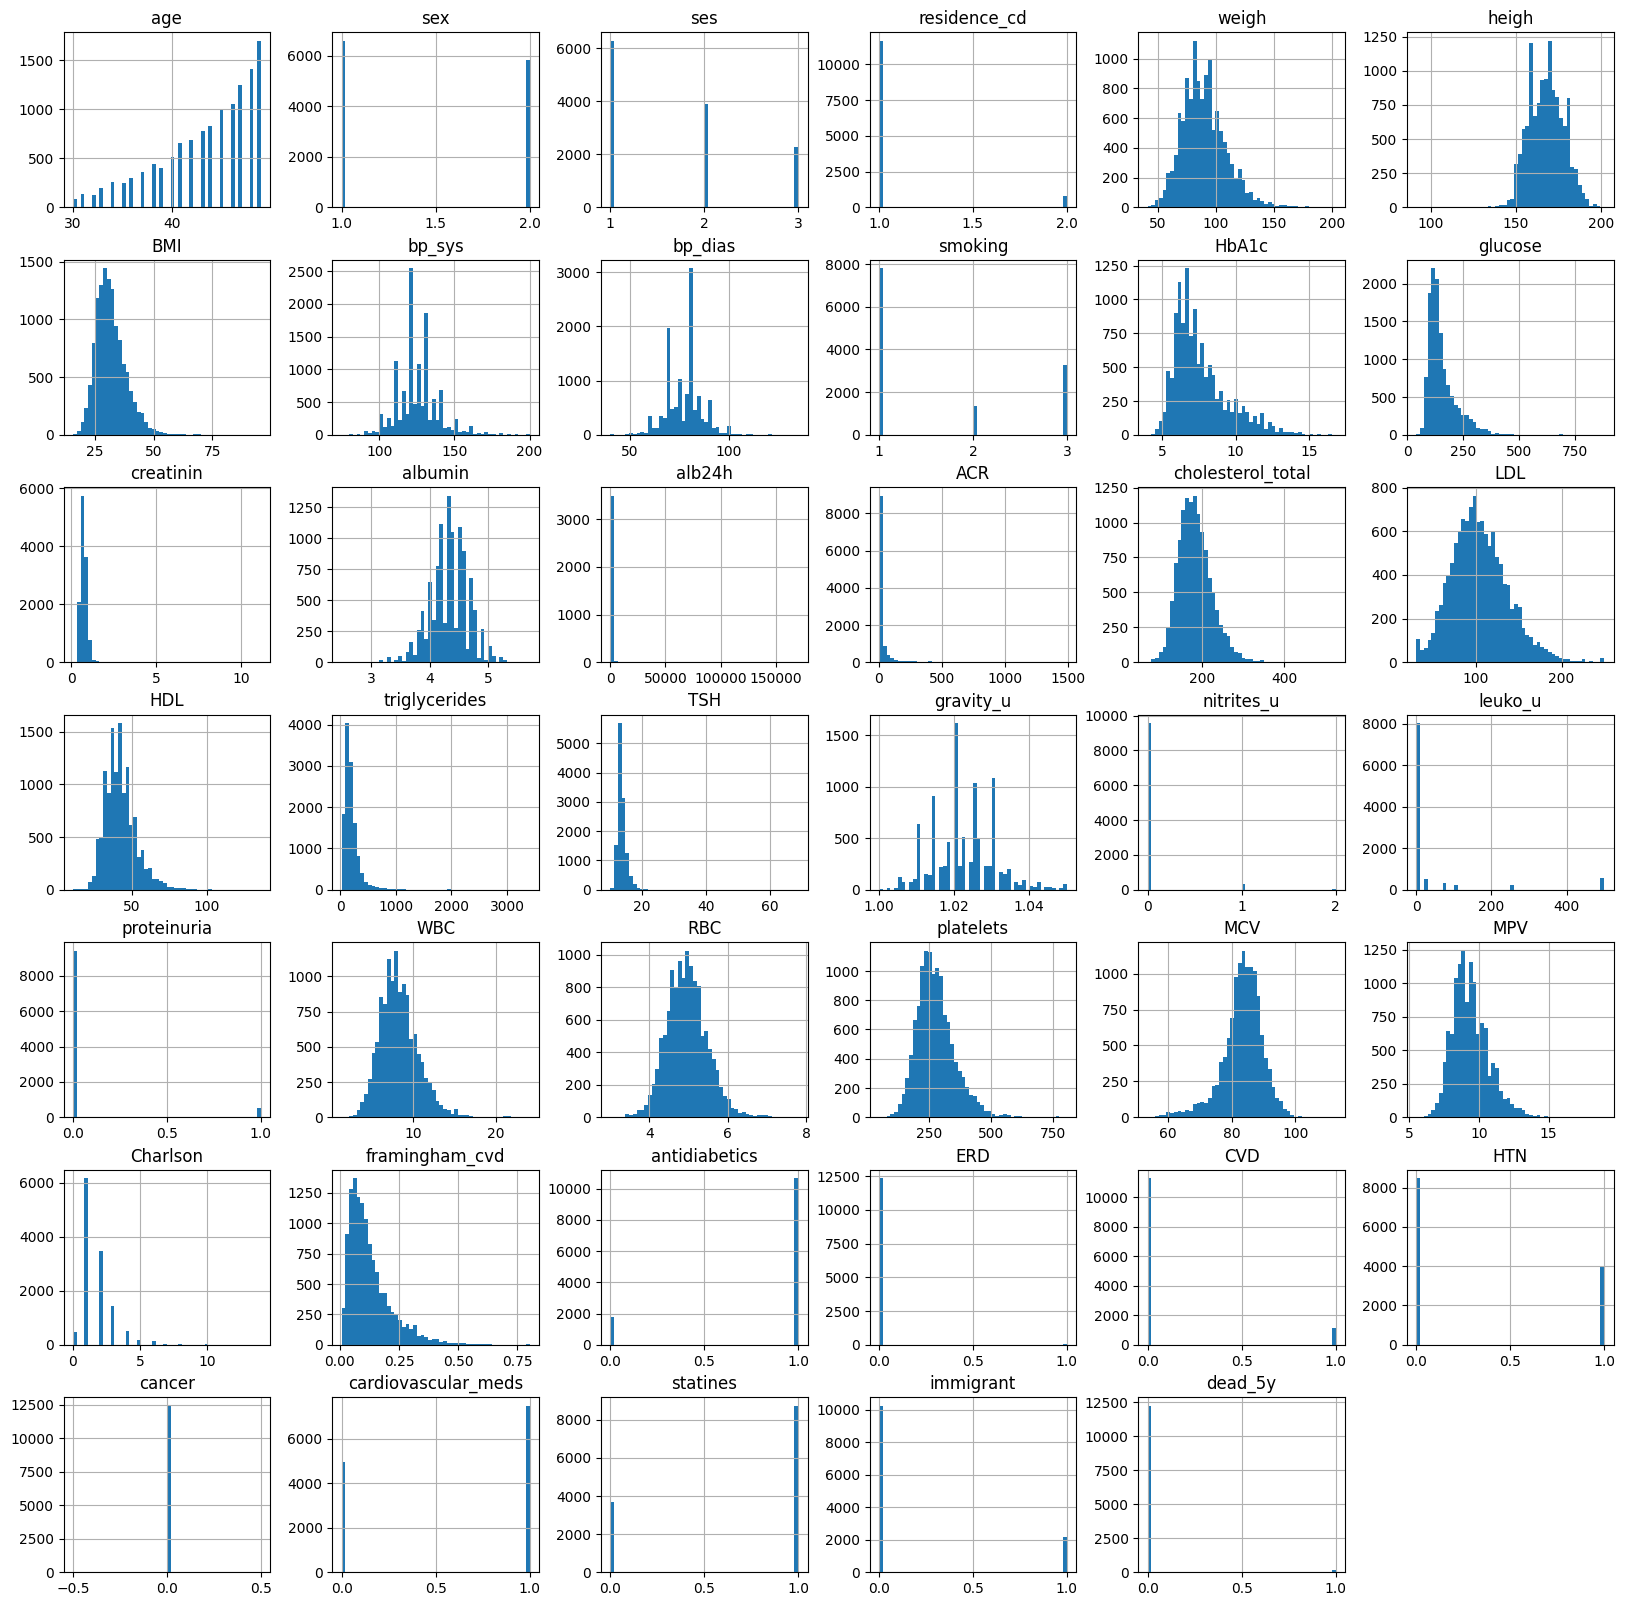

In [7]:
dataset.hist(bins=50, figsize=(20,20))

We have a lot of normalized data, we mean bell shape distribution. <br>
Another thing that we can see is that most of the people didn't died. So, we counter a problem that the data is unbalanced and we need to somehow solve it. This is normal and obvious that the dead_5y is unbalanced but as we saw with past problems such as covid-19 we saw that unbalanced data leads to unreliable results

In [8]:
dataset["dead_5y"].value_counts()

dead_5y
0    12241
1      197
Name: count, dtype: int64

In [9]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,12438.0,43.501126,4.802035,30.00000,41.0000,45.00000,48.00000,49.00000
sex,12438.0,1.468805,0.499046,1.00000,1.0000,1.00000,2.00000,2.00000
ses,12438.0,1.677279,0.763641,1.00000,1.0000,1.00000,2.00000,3.00000
residence_cd,12438.0,1.062631,0.242307,1.00000,1.0000,1.00000,1.00000,2.00000
weigh,12438.0,89.837746,19.296247,41.00000,76.0000,88.00000,100.00000,203.00000
heigh,12438.0,167.943906,10.068620,91.50000,160.0000,168.00000,175.00000,202.00000
BMI,12438.0,31.871922,6.459714,15.79000,27.4000,31.05000,35.35000,95.55000
bp_sys,12438.0,124.803988,13.615760,75.00000,118.0000,124.00000,130.00000,200.00000
bp_dias,12438.0,77.315163,8.915362,40.00000,70.0000,79.00000,80.00000,135.00000
smoking,12438.0,1.636678,0.871735,1.00000,1.0000,1.00000,3.00000,3.00000


hopa, cancer has all zeros, that's very weird. Let's check if we can get rid of this column.

In [10]:
dataset["cancer"].value_counts()

cancer
0    12438
Name: count, dtype: int64

All the values are 0's so we can delete it.

In [11]:
to_delete = ["cancer"]

## Checking the hypothesises

In [12]:
# hypothesis 1: smoking_status antidiabetics ERD CVD HTN cardiovascular_meds statines connected somehow to dead_5y
hypo_parameters = "smoking_status antidiabetics ERD CVD HTN cardiovascular_meds statines".split(' ')
hypo_parameters

['smoking_status',
 'antidiabetics',
 'ERD',
 'CVD',
 'HTN',
 'cardiovascular_meds',
 'statines']

In [13]:
aggregated_means = {}


for item in hypo_parameters: 
    print(f"Table for item: {item}")
    means = dataset[[item,'dead_5y']].groupby([item], as_index=False).mean()
    print(means)
    print("\n")
    aggregated_means[item] = means['dead_5y'].min()

Table for item: smoking_status
   smoking_status   dead_5y
0  current_smoker  0.023730
1      non_smoker  0.012939
2     past_smoker  0.013383


Table for item: antidiabetics
   antidiabetics   dead_5y
0              0  0.030508
1              1  0.013405


Table for item: ERD
   ERD   dead_5y
0    0  0.015296
1    1  0.097561


Table for item: CVD
   CVD   dead_5y
0    0  0.013460
1    1  0.039301


Table for item: HTN
   HTN   dead_5y
0    0  0.013676
1    1  0.020475


Table for item: cardiovascular_meds
   cardiovascular_meds   dead_5y
0                    0  0.014974
1                    1  0.016409


Table for item: statines
   statines   dead_5y
0         0  0.016199
1         1  0.015686




because the data is very unbalanced we can't see anything clear here, we should try ploting it visualy.

<Figure size 1000x600 with 0 Axes>

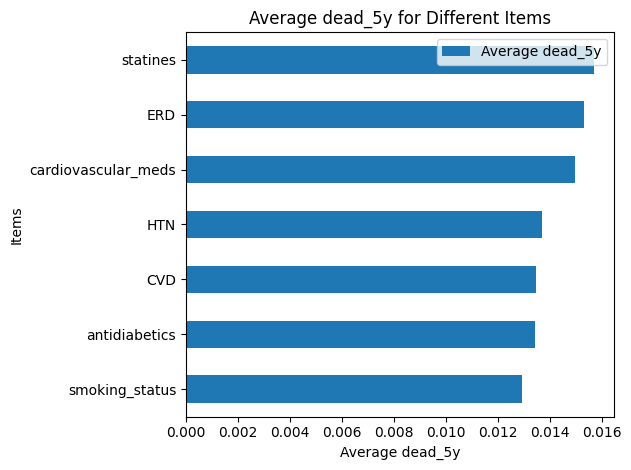

In [14]:
means = pd.DataFrame(aggregated_means.values(), index=hypo_parameters, columns=['Average dead_5y'])
sorted_means = means.sort_values(by='Average dead_5y', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sorted_means.plot.barh()
plt.xlabel('Average dead_5y')
plt.ylabel('Items')
plt.title('Average dead_5y for Different Items')
plt.tight_layout()

# Show the plot
plt.show()

We can see that statines has the most impact of those values.

### Correlation matrix

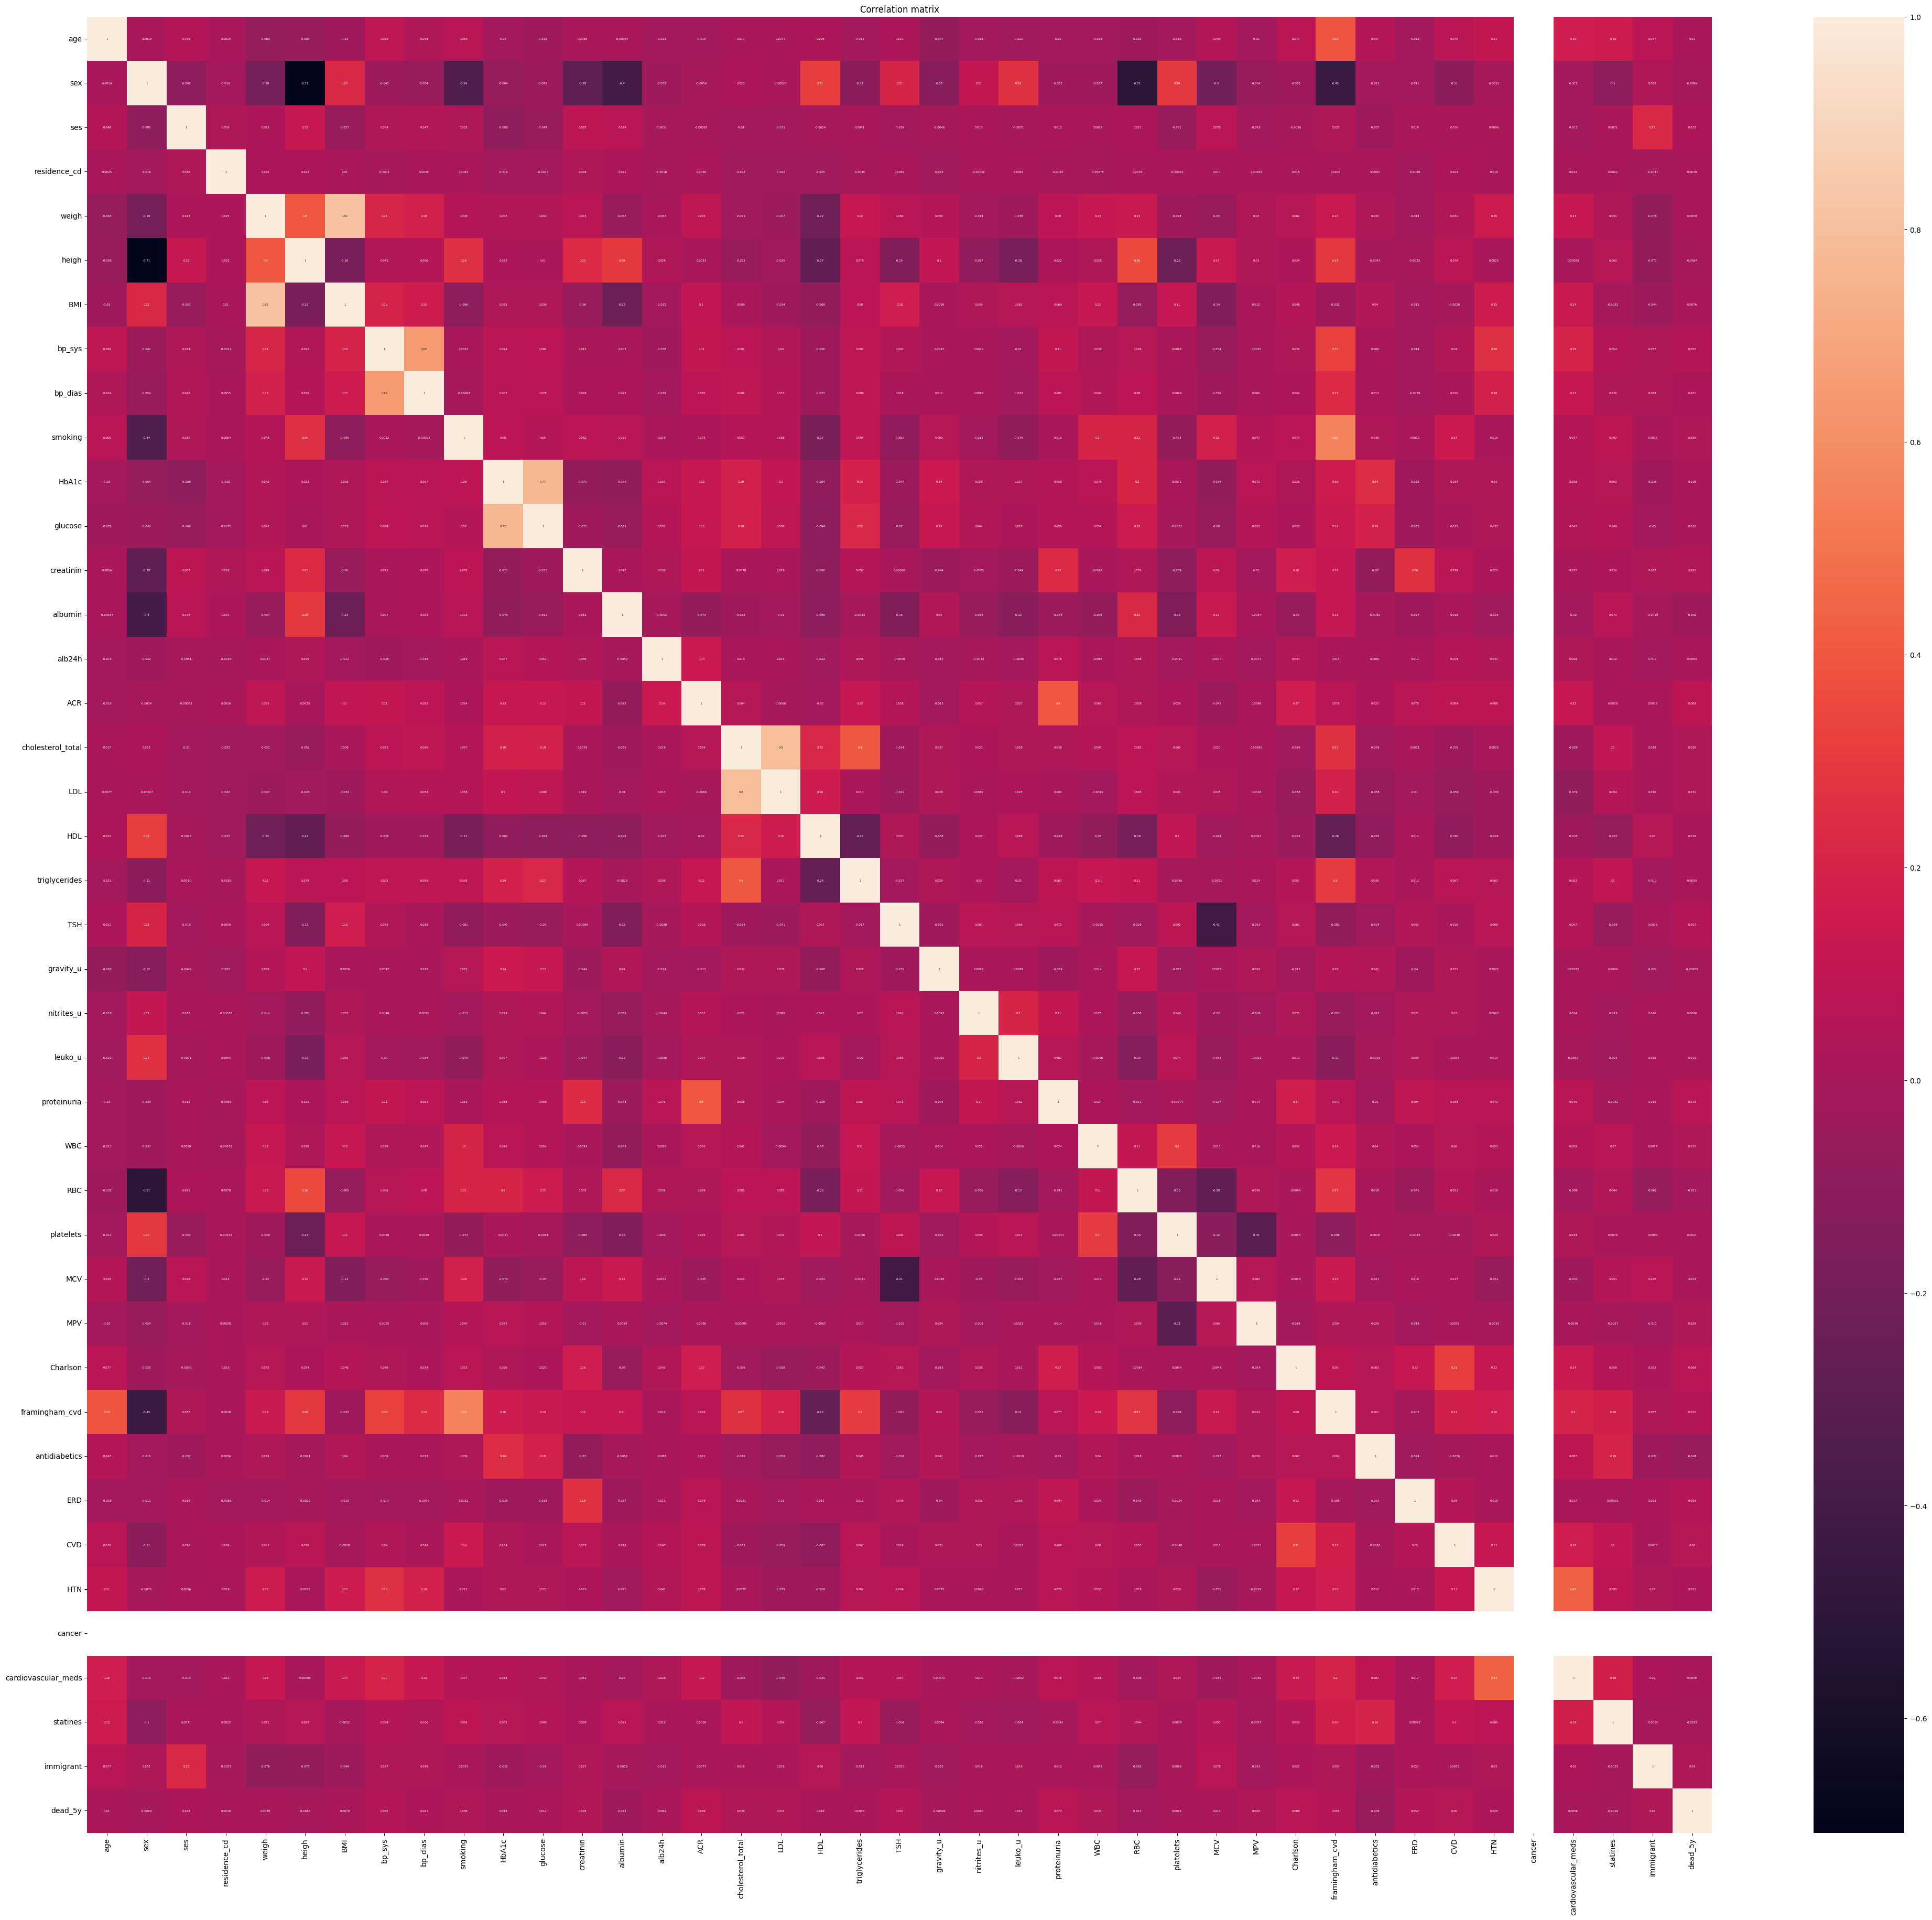

In [15]:
correlation_mat = dataset.corr(numeric_only=True)
plt.figure(figsize=(50, 45))

sns.heatmap(correlation_mat, annot = True, annot_kws={"size": 4})
plt.title("Correlation matrix")
plt.show()

It's very messy, let's try plotting it more friendly.

In [16]:
# Exclude diagonal and duplicate entries, and get the absolute values
upper_triangle = correlation_mat.where(np.triu(np.ones(correlation_mat.shape), k=1).astype(bool))
upper_triangle_abs = upper_triangle.abs().unstack()

# Sort the values to get the top 10 correlations
top_10_correlations = upper_triangle_abs.sort_values(ascending=False).head(10)

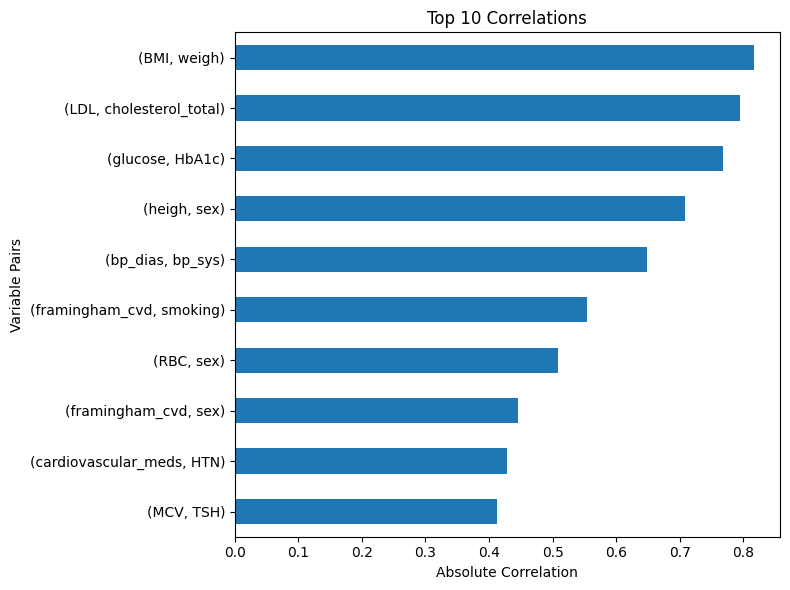

In [17]:
# Create a horizontal bar plot
plt.figure(figsize=(8, 6))
bar_plot  = top_10_correlations.plot(kind='barh')

plt.xlabel('Absolute Correlation')
plt.ylabel('Variable Pairs')
bar_plot.invert_yaxis()
plt.title('Top 10 Correlations')
plt.tight_layout()

plt.show()

We can see a clear connection between:
1. BMI and weigh, not surprsing.
2. LDL and cholesterol_total.
3. glucose and HbA1c - HbA1c is the mean of the last 3 months of glucose.
4. heigh and sex - probably men are taller than women.
5. bp_dias and bp_sys - both talks about blood pressure

> Together, systolic and diastolic blood pressure measurements provide a comprehensive view of an individual's blood pressure and cardiovascular health. Abnormalities in either of these measurements can indicate underlying health issues, such as hypertension (high blood pressure) or hypotension (low blood pressure), which can have implications for overall health and well-being. Blood pressure is an important vital sign that healthcare professionals monitor to assess cardiovascular health and risk

> The connection between "cholesterol_total" and "LDL" lies in the fact that "cholesterol_total" includes all types of cholesterol, and within this total, LDL cholesterol is a significant contributor to the risk of cardiovascular disease. When doctors assess an individual's cholesterol levels, they often focus on the LDL cholesterol value because of its direct link to heart health.

We can see that some people that are taking cardiovascular meds died in the 5 years. So we will check about it later.

**Note🔑**: We will remove the columns at the end. Using a function that will preprocess all the data in once. 

In [18]:
to_delete.append("weigh")
to_delete.append("heigh")

### hypothesis 2:

High age combined with some diseases will have higher chances to be dead by 5 years.<br>
Diseases are in the hypo_parameters list. We will explore this now.

In [19]:
hypo_parameters

['smoking_status',
 'antidiabetics',
 'ERD',
 'CVD',
 'HTN',
 'cardiovascular_meds',
 'statines']

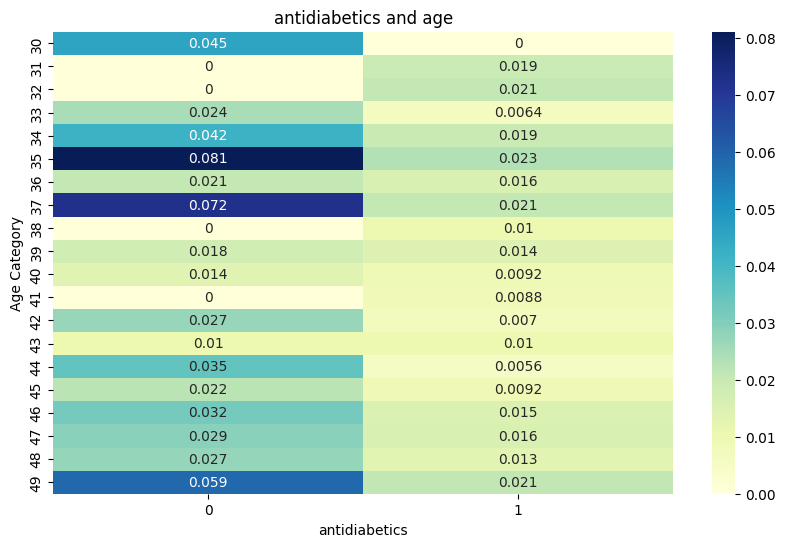

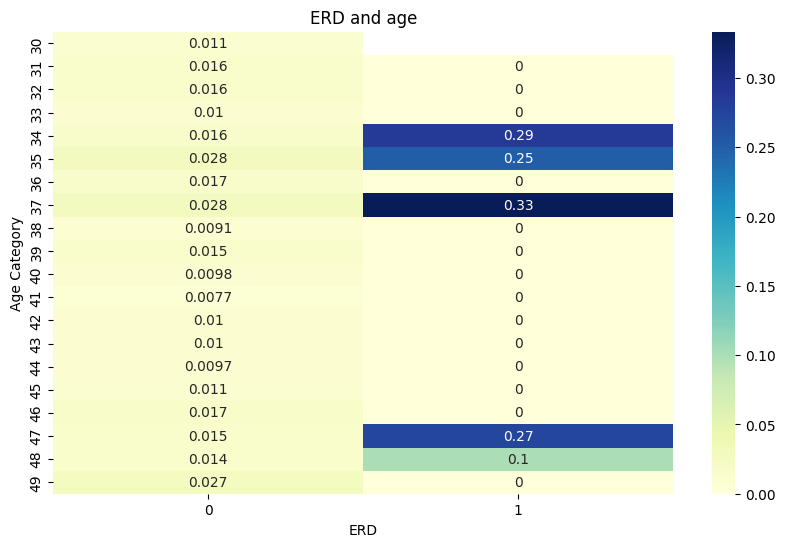

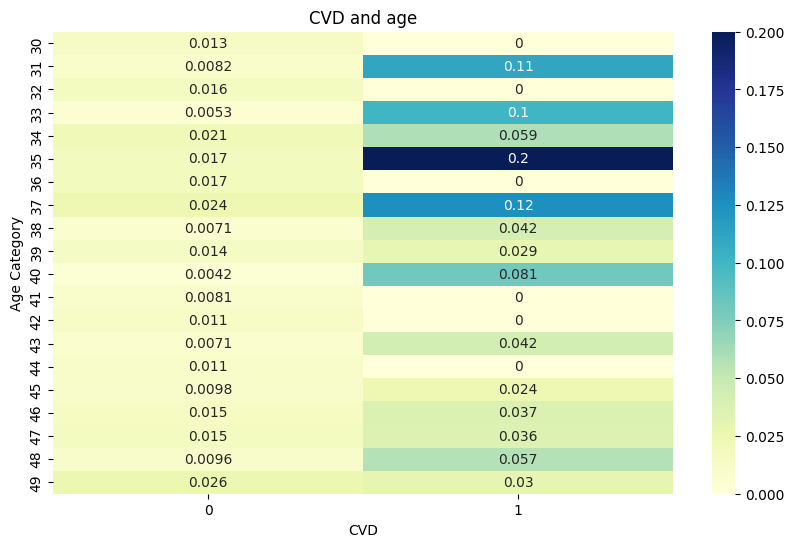

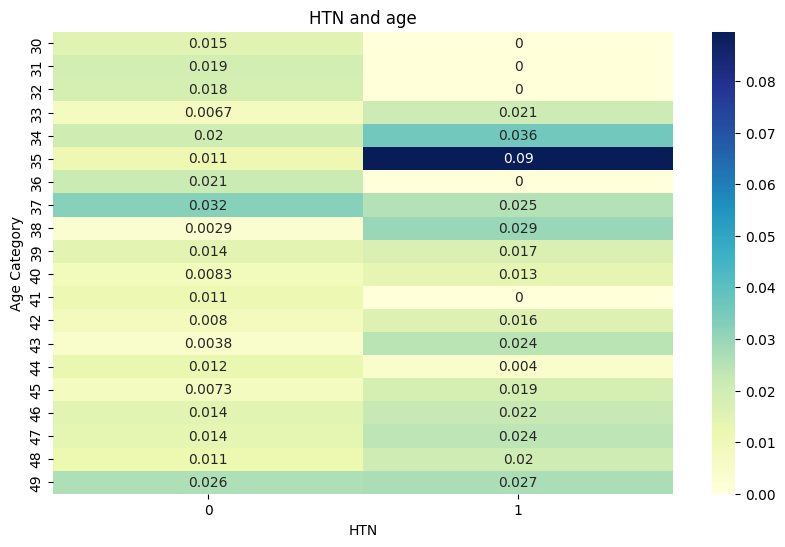

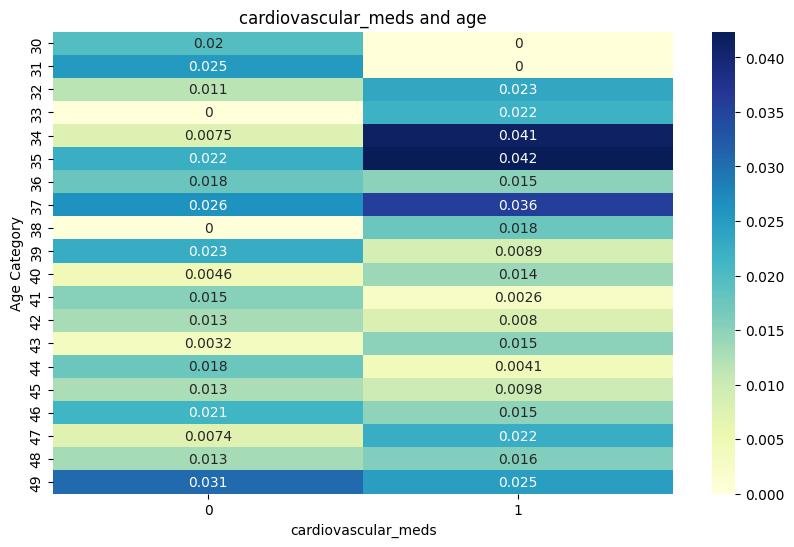

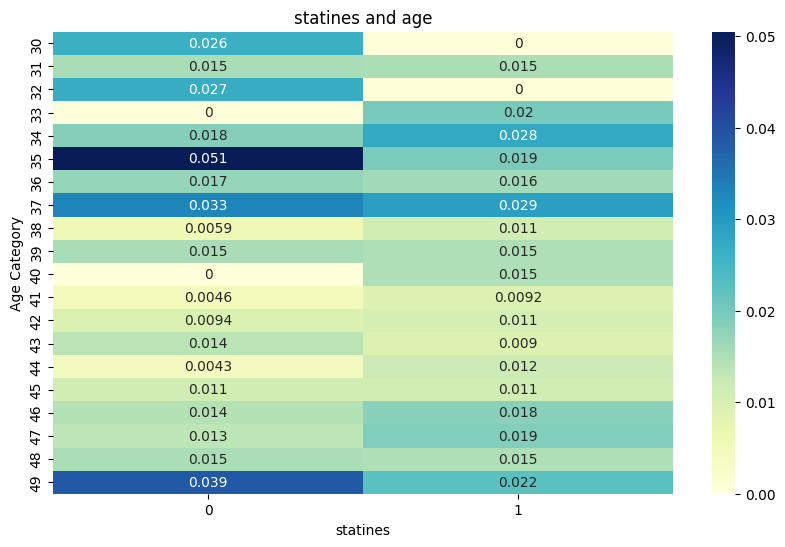

In [20]:
for i, item in enumerate(hypo_parameters[1:]):
    subdata = dataset.groupby(['age', item])['dead_5y'].mean().unstack()

    # Create a heatmap using Seaborn
    plt.figure(figsize=(10, 6))
    sns.heatmap(subdata, annot=True, cmap="YlGnBu")
    plt.title(f"{item} and age")
    plt.xlabel(item)
    plt.ylabel("Age Category")
    plt.show()

In [21]:
len(dataset[(dataset["ERD"] == 1) & (dataset["dead_5y"]==1)])

8

Something here is very strage, we can see that the most people doesn't died from ERD. We can assume that not many people had ERD.

In [22]:
dataset["ERD"].value_counts()

ERD
0    12356
1       82
Name: count, dtype: int64

only 8 people out of 82 died in 5 years. so maybe the ERD is not very deadly as we think. :)

In [23]:
len(dataset[(dataset["CVD"] == 1) & (dataset["dead_5y"]==1)])

45

45 people with CVD died while there 1145 people with CVD. again, not a lot of people.

In [24]:
dataset["CVD"].value_counts()

CVD
0    11293
1     1145
Name: count, dtype: int64

In [25]:
d = dataset.loc[dataset["cardiovascular_meds"] == 1]
d["dead_5y"].value_counts()

dead_5y
0    7373
1     123
Name: count, dtype: int64

123 people that are taking cardiovascular_meds died. 

In [26]:
d = dataset.loc[dataset["statines"] == 1]
d["dead_5y"].value_counts()

dead_5y
0    8597
1     137
Name: count, dtype: int64

137 people that are taking statines died. 

In [27]:
dataset["antidiabetics"].value_counts()

antidiabetics
1    10668
0     1770
Name: count, dtype: int64

In [28]:
d = dataset.loc[dataset["antidiabetics"] == 1]
d["dead_5y"].value_counts()

dead_5y
0    10525
1      143
Name: count, dtype: int64

**Note🔑**: Those are not big numbers of people but as we know, the medicines should help preventing death so it makes sense.


### result hypo 2:
some disieses like statines and cardiovascular_meds have more people who died at older age but not all of them. It is making sense because those are not death sentence disieses. We found a small connection as we expected but it is not strong enough to determine. maybe all the values combined are more helpful so we will keep those values.

## Hypothesis 3:
Maybe people that are coming from higher social economic state will survive

In [29]:
dataset.ses.unique()

array([1, 2, 3], dtype=int64)

1 is low 2 is mid and 3 is high. <br>
we will try finding the connection.

C:\Users\User\AppData\Local\Temp\ipykernel_21552\167795217.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])


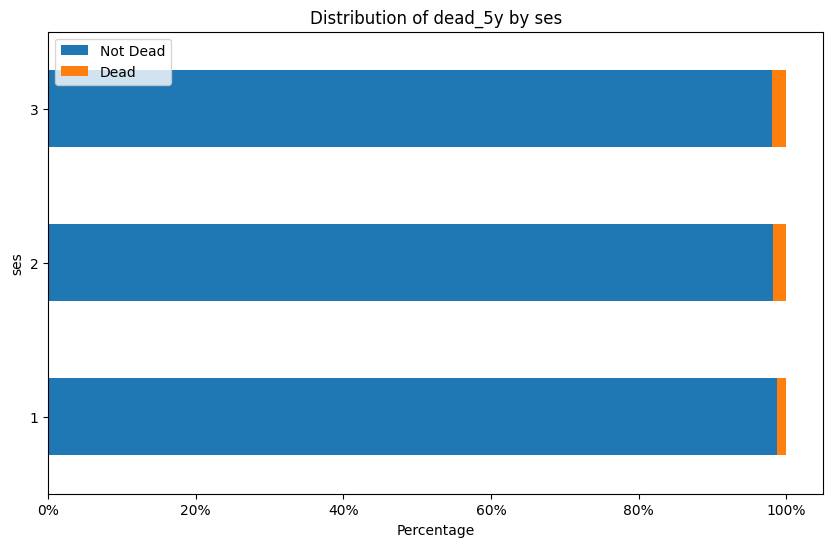

In [30]:
grouped = dataset.groupby('ses')['dead_5y'].value_counts(normalize=True).unstack()

# Plotting
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6))
ax.set_title('Distribution of dead_5y by ses')
ax.set_ylabel('ses')
ax.set_xlabel('Percentage')
ax.set_yticklabels(dataset.ses.unique())
ax.legend(['Not Dead', 'Dead'])

# Convert x-axis to percentage
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])

plt.show()

We can see that most of the people survived and more people from higher ses died.

In [31]:
grouped = dataset.groupby('ses')['dead_5y'].value_counts().unstack()
grouped

dead_5y,0,1
ses,,
1,6200,81
2,3819,71
3,2222,45


We can see that most people dies in ses 1, but we don't have the same population in each group.
<br> The proportion is looks the biggest in 3 and 2 but the most people were in group 1.

### result:
We didn't find a strong connection between dead_5y to ses. Let's find if ses is correlated with something.

In [32]:
ses_corr = pd.DataFrame(dataset.corr(numeric_only=True).unstack()["ses"])
ses_corr.sort_values(by=0, ascending=False)

,0
ses,1.000000
immigrant,0.220889
heigh,0.126853
creatinin,0.087466
albumin,0.078656
MCV,0.077702
age,0.047965
bp_dias,0.042139
framingham_cvd,0.036928
residence_cd,0.036240


We don't see a strong connection between anything. 
<br> We can delete this column.

In [33]:
to_delete.append("ses")
to_delete

['cancer', 'weigh', 'heigh', 'ses']

## Hypothesis 4
Maybe the gender has an impact of the target value.

C:\Users\User\AppData\Local\Temp\ipykernel_21552\1350809945.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])


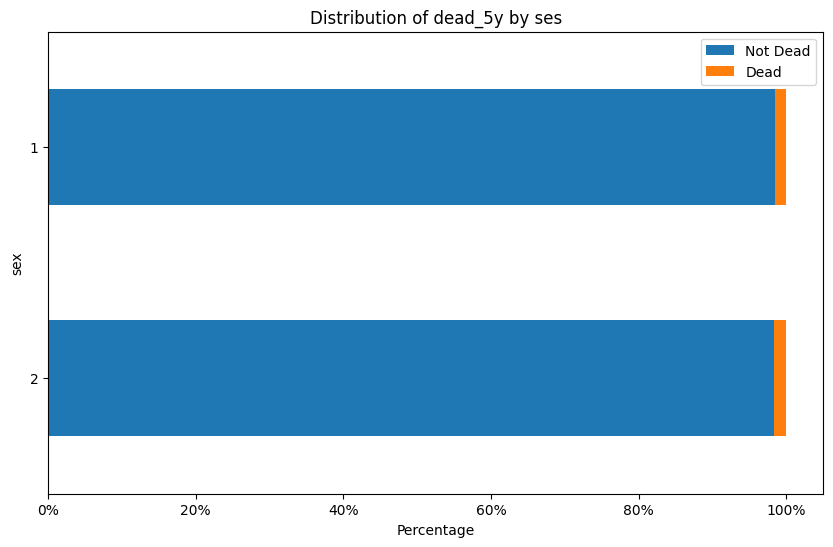

In [34]:
grouped = dataset.groupby('sex')['dead_5y'].value_counts(normalize=True).unstack()

# Plotting
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6))
ax.set_title('Distribution of dead_5y by ses')
ax.set_ylabel('sex')
ax.set_xlabel('Percentage')
ax.set_yticklabels(dataset.sex.unique())
ax.legend(['Not Dead', 'Dead'])

# Convert x-axis to percentage
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])

plt.show()

We can't see a difference in the proportions.

In [35]:
grouped = dataset.groupby('sex')['dead_5y'].value_counts().unstack()
grouped

dead_5y,0,1
sex,,
1,6497,110
2,5744,87


We can see that more men died then women but we have more men so it is not very clear that more men died.

In [36]:
ses_corr = pd.DataFrame(dataset.corr(numeric_only=True).unstack()["sex"])
ses_corr.sort_values(by=0, ascending=False)

,0
sex,1.000000
HDL,0.308691
platelets,0.291358
leuko_u,0.262107
BMI,0.219942
TSH,0.206045
nitrites_u,0.111067
immigrant,0.031958
cholesterol_total,0.022982
age,0.001877


We can see that sex is the most correlated with high, and we said earlier that it is not surprsing.

### result hypo 4:
We found that the proportions of men and women are not very different but maybe combining sex with other category leads to different results.

In [37]:
ses_corr_men = pd.DataFrame(dataset.loc[dataset.sex == 1].corr(numeric_only=True)["dead_5y"])
ses_corr_men.sort_values(by="dead_5y", ascending=False)

,dead_5y
dead_5y,1.000000
ACR,0.090122
proteinuria,0.081562
Charlson,0.079370
ERD,0.071474
TSH,0.066134
CVD,0.060578
creatinin,0.060455
framingham_cvd,0.051339
immigrant,0.044845


We don't see a strong connection with any of the categories even the sex is men. So we might delete the gender.

## Hypothesis 5:
According to some reaserchers, the family condition has an direct impact of the survivance chances (singles have more chances to die)<br> We will do the same process here but with family condition

C:\Users\User\AppData\Local\Temp\ipykernel_21552\101152371.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])


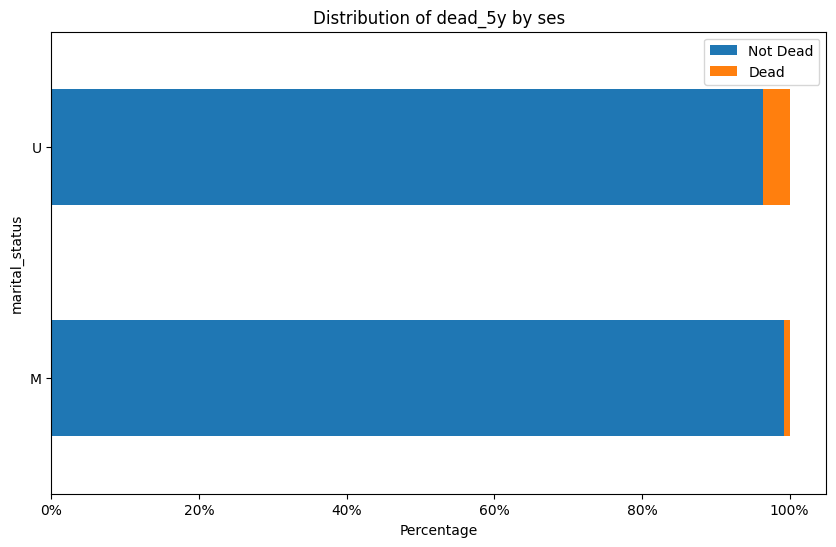

In [38]:
grouped = dataset.groupby('marital_status')['dead_5y'].value_counts(normalize=True).unstack()

# Plotting
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6))
ax.set_title('Distribution of dead_5y by ses')
ax.set_ylabel('marital_status')
ax.set_xlabel('Percentage')
ax.set_yticklabels(dataset.marital_status.unique()[::-1])
ax.legend(['Not Dead', 'Dead'])

# Convert x-axis to percentage
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])

plt.show()

Let's check about single men:

C:\Users\User\AppData\Local\Temp\ipykernel_21552\1704621172.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])


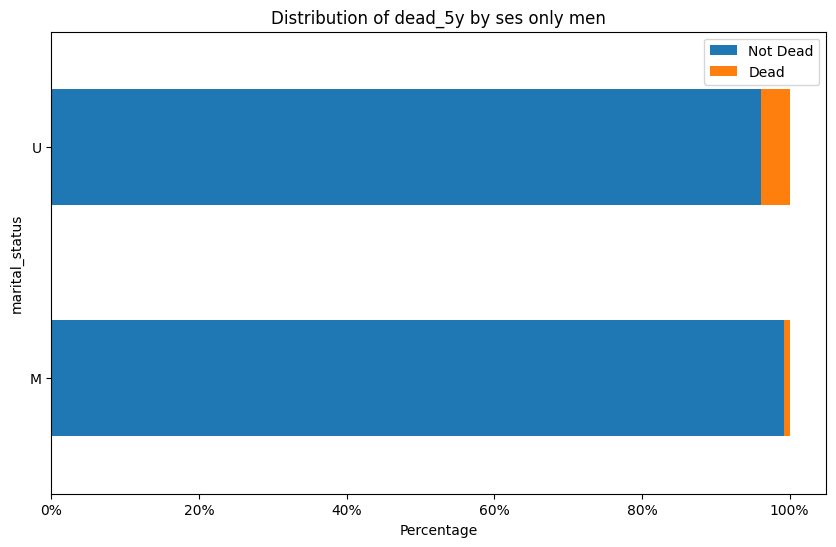

In [39]:
grouped_men = dataset[dataset.sex == 1]
grouped = grouped_men.groupby('marital_status')['dead_5y'].value_counts(normalize=True).unstack()

# Plotting
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6))
ax.set_title('Distribution of dead_5y by ses only men')
ax.set_ylabel('marital_status')
ax.set_xlabel('Percentage')
ax.set_yticklabels(dataset.marital_status.unique()[::-1])
ax.legend(['Not Dead', 'Dead'])

# Convert x-axis to percentage
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])

plt.show()

In [40]:
grouped = dataset.groupby('marital_status')['dead_5y'].value_counts().unstack()
grouped

dead_5y,0,1
marital_status,,
M,8478,59
U,3763,138


In [41]:
grouped = grouped_men.groupby('marital_status')['dead_5y'].value_counts().unstack()
grouped

dead_5y,0,1
marital_status,,
M,4501,31
U,1996,79


Wow, we have got surprsing result, more singles died than married people and most of them were men. 
### result Hypo 5:
The hypothesis was found to be correct and more singles died then marrid, we won't delete that column

## Hypothesis 6:
LDL may cause some problems and might have an impact.
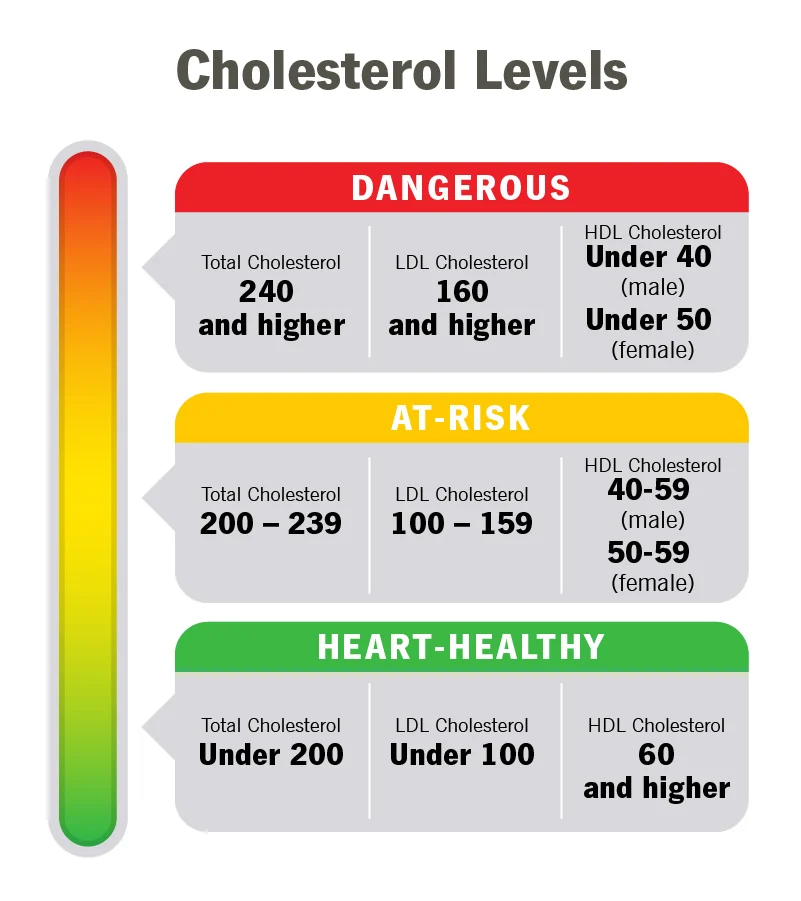

In [42]:
dataset["LDL"].describe()

count    12438.000000
mean       104.314327
std         33.206564
min         30.000000
25%         81.300000
50%        101.200000
75%        124.400000
max        250.000000
Name: LDL, dtype: float64

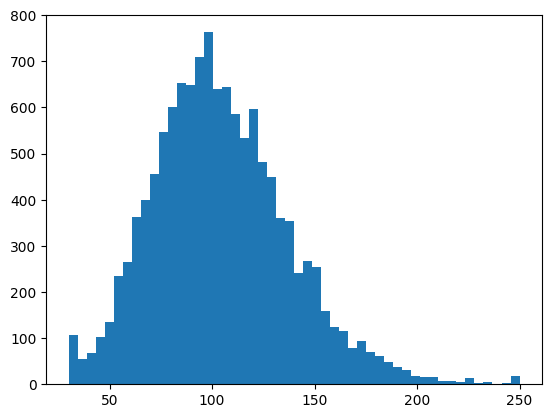

In [43]:
dataset["LDL"].hist(bins=50)
plt.grid(False)

We can se that we have a distribution of skewed bell with left heavy tail and right long tail. 
<br> The left side is making sense because there is a minimal amount of LDL in every person, the right side is the outliers. Let<br> Let's plot the abnormal exceptions.

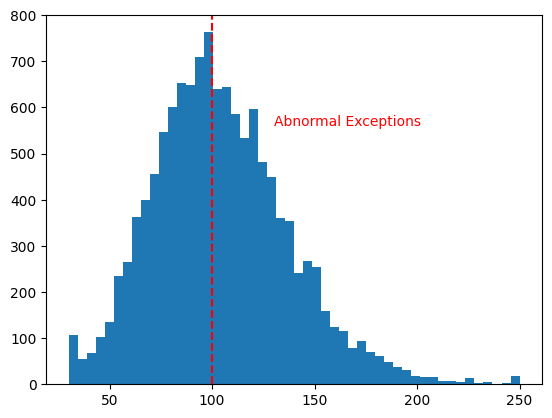

In [44]:
dataset["LDL"].hist(bins=50)
plt.grid(False)
# Add a vertical line at 100
plt.axvline(x=100, color='red', linestyle='dashed')

# Add a label to the right of the line
plt.text(130, 0.7 * plt.ylim()[1], "Abnormal Exceptions", color='red')

# Show the plot
plt.show()

In [45]:
pd.DataFrame(dataset["dead_5y"].loc[dataset.LDL > 100].value_counts(normalize=True))

,proportion
dead_5y,
0,0.981787
1,0.018213


1.8% of the people with High LDL died.

In [46]:
pd.DataFrame(dataset["dead_5y"].loc[dataset.LDL > 160].value_counts())

,count
dead_5y,
0,670
1,21


3% of the people with Dangerous LDL died.

We can see that high LDL doesn't have a very strong impact but it affects a little.
<br> Let's find out what about the cholesterol_total


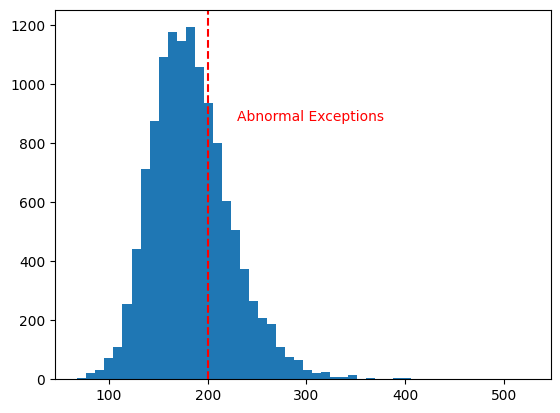

In [47]:
dataset["cholesterol_total"].hist(bins=50)
plt.grid(False)
# Add a vertical line at 100
plt.axvline(x=200, color='red', linestyle='dashed')

# Add a label to the right of the line
plt.text(230, 0.7 * plt.ylim()[1], "Abnormal Exceptions", color='red')

# Show the plot
plt.show()

In [48]:
pd.DataFrame(dataset["dead_5y"].loc[dataset.cholesterol_total > 200].value_counts(normalize=True))

,proportion
dead_5y,
0,0.978313
1,0.021687


In [49]:
pd.DataFrame(dataset["dead_5y"].loc[dataset.cholesterol_total > 240].value_counts(normalize=True))

,proportion
dead_5y,
0,0.973783
1,0.026217


We can see that 2.6% of the dangerous total cholesterol died.

### result hypo 6: 
There is a little connection between LDL and cholesterol_total to dead_5y by not very strong, that is because most of the patients were alive and the data is very unbalanced. So it is making sense.<br>
We can also see a difference in the HDL risk levels between the different genders. So we will classify the class of each patient according to his gender.

## Hypothesis 7:
Immigrants might not afford medical treatment so they might die.

In [50]:
pd.DataFrame(dataset["dead_5y"].loc[dataset.immigrant == 1].value_counts(normalize=True))

,proportion
dead_5y,
0,0.976092
1,0.023908


2.4% of the immigrants died. that's a pretty large number to a population

In [51]:
dataset_immigrants = dataset.loc[dataset.immigrant == 1]

In [52]:
dataset_immigrants.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2175.0,44.299310,4.664165,30.00000,42.000000,46.00000,48.000000,49.00000
sex,2175.0,1.503448,0.500103,1.00000,1.000000,2.00000,2.000000,2.00000
ses,2175.0,2.043678,0.692598,1.00000,2.000000,2.00000,3.000000,3.00000
residence_cd,2175.0,1.060690,0.238815,1.00000,1.000000,1.00000,1.000000,2.00000
weigh,2175.0,86.638529,20.208454,44.00000,73.000000,84.00000,97.000000,200.90000
heigh,2175.0,166.399678,9.962424,91.50000,160.000000,166.00000,173.000000,197.00000
BMI,2175.0,31.257549,6.754332,15.79000,26.670000,30.47000,34.585000,81.50000
bp_sys,2175.0,125.892414,14.739361,75.00000,118.000000,125.00000,132.000000,199.00000
bp_dias,2175.0,77.861149,9.372739,40.00000,70.000000,80.00000,82.000000,120.00000
smoking,2175.0,1.643678,0.878772,1.00000,1.000000,1.00000,3.000000,3.00000


We can see that not a lot of them had CVD and ERD and most of them are not smoking (maybe they don't have enough money). 
<br> Let's examine the connection between imigrants and smoking

In [53]:
pd.DataFrame(dataset_immigrants[["smoking", "dead_5y"]].groupby("smoking").value_counts())

count
smoking dead_5y       
1       0         1347
        1           18
2       0          215
        1            5
3       0          561
        1           29

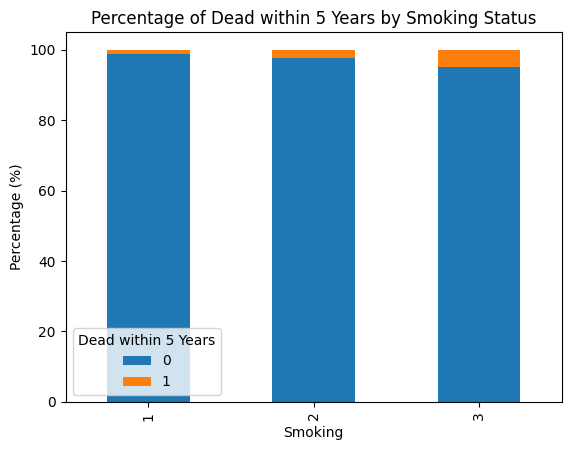

In [54]:
# Group the data and count occurrences
grouped = dataset_immigrants.groupby(["smoking", "dead_5y"]).size().reset_index(name="count")

# Pivot the table for plotting
pivot_table = grouped.pivot(index="smoking", columns="dead_5y", values="count")

# Normalize the data to percentages
pivot_table_percent = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Create the bar plot
pivot_table_percent.plot(kind="bar", stacked=True)

# Set labels and title
plt.xlabel("Smoking")
plt.ylabel("Percentage (%)")
plt.title("Percentage of Dead within 5 Years by Smoking Status")

# Show the legend
plt.legend(title="Dead within 5 Years")

plt.show()

In [55]:
pivot_table_percent

dead_5y,0,1
smoking,,
1,98.681319,1.318681
2,97.727273,2.272727
3,95.084746,4.915254


We can see that more immigrants that were smoking had more chances to die in 5 years.

## Hypothesis 8
Maybe there is a connection between glucose, HbA1c and antidiabetics to dead_5y.<br>
Diebetes is a disiese which affects the glucose amount in the blood.<br>
Maybe the data consists a lot of diabetics so we will need to check it.


In [56]:
len(dataset[dataset["antidiabetics"] == 1])/ len(dataset)* 100

85.76941630487217

85% of the dataset is diabetics.

In [57]:
diabetics_df = dataset[dataset["antidiabetics"] == 1]

<Axes: >

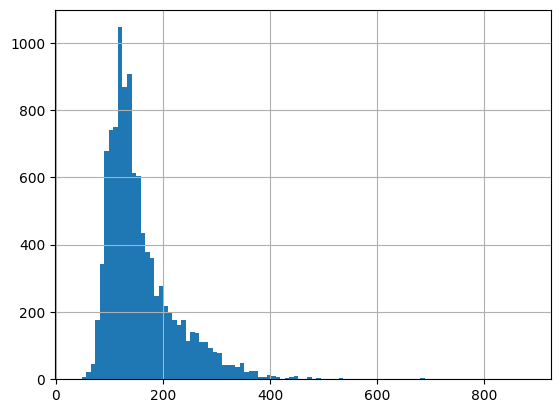

In [58]:
diabetics_df["glucose"].hist(bins=100)

In [59]:
diabetics_df["glucose"].max()

883

In [60]:
diabetics_df.loc[diabetics_df["glucose"]==883].T

,3569
age,47
sex,2
marital_status,M
ses,1
residence_cd,1
residence,urban
weigh,112.0
heigh,155.0
BMI,46.9
bp_sys,139


Something here is very very strange, Man with 883 glucose somehow didn't die. It's way too much then the average.

In [61]:
diabetics_df.loc[diabetics_df["glucose"]>400].T

,140,244,362,572,833,1069,1083,1360,1388,1866,...,10762,10773,10807,10846,10986,11124,11497,11618,11857,12202
age,49,48,41,47,42,46,45,34,48,34,...,49,31,46,49,37,44,47,49,44,43
sex,1,2,1,1,1,1,2,1,1,1,...,1,1,2,1,1,2,2,1,2,1
marital_status,M,M,M,M,U,M,M,M,M,M,...,M,M,M,M,U,M,M,M,U,U
ses,3,1,2,1,2,1,1,2,3,1,...,1,1,1,1,1,3,2,3,1,3
residence_cd,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,2,1,1,1,1,1
residence,urban,urban,urban,urban,urban,urban,urban,urban,urban,urban,...,urban,urban,urban,urban,rural,urban,urban,urban,urban,urban
weigh,100.0,124.0,140.0,104.0,86.0,97.0,64.5,60.0,118.0,136.0,...,95.0,126.0,96.0,78.0,82.0,100.5,65.0,74.0,73.0,102.0
heigh,178.0,153.0,179.0,165.0,175.0,169.0,150.0,173.0,185.0,178.0,...,164.0,177.0,156.0,160.0,183.0,170.0,152.0,169.0,150.0,174.5
BMI,31.56,53.18,44.01,38.2,28.08,33.96,29.14,20.05,33.74,43.69,...,35.32,41.0,39.86,30.47,24.76,34.6,28.13,25.91,32.62,33.31
bp_sys,120,136,140,123,90,120,100,118,135,106,...,116,115,130,135,124,136,120,130,136,158


We can see that there are many people with high glucose because they are diabetics and they need a medical treatment so let's check how many of them are taking antidiabetics

In [62]:
len(dataset.loc[(dataset["glucose"]>400)])

62

We can see that 2 of 62 are not taking antidiabetics so maybe the 2 ate something before the blood measurement.

In [63]:
dataset.loc[(dataset["glucose"]>400) & ((dataset["antidiabetics"]==0))]

,age,sex,marital_status,ses,residence_cd,residence,weigh,heigh,BMI,bp_sys,...,framingham_cvd,antidiabetics,ERD,CVD,HTN,cancer,cardiovascular_meds,statines,immigrant,dead_5y
240,38,1,M,1,1,urban,110.0,173.0,36.42,120,...,0.09276,0,0,0,1,0,1,0,0,0
6688,35,2,U,2,1,urban,52.0,168.0,18.42,145,...,0.05729,0,0,0,1,0,0,0,0,0


Note: those 2: 1 in underweight and the other is overweight. Maybe that's explains the extremely abnormal results.

Let's take a look at all the people who has high glucose and high Hba1c

In [64]:
diabetics_extremely_abnormal = diabetics_df.loc[(diabetics_df["glucose"] > 200) & (diabetics_df["HbA1c"] > 6.4)]
diabetics_extremely_abnormal.head()

,age,sex,marital_status,ses,residence_cd,residence,weigh,heigh,BMI,bp_sys,...,framingham_cvd,antidiabetics,ERD,CVD,HTN,cancer,cardiovascular_meds,statines,immigrant,dead_5y
0,49,2,U,1,1,urban,84.0,160.0,32.79,116,...,0.12908,1,0,0,1,0,1,1,0,0
2,46,2,U,1,1,urban,62.4,148.0,28.31,133,...,0.10715,1,0,0,1,0,1,1,0,0
3,45,1,U,2,1,urban,73.9,166.0,26.85,100,...,0.10110,1,0,0,0,0,0,1,0,0
12,44,2,M,1,1,urban,60.0,158.0,23.85,106,...,0.08461,1,0,0,0,0,0,1,0,0
19,45,1,U,2,1,urban,83.0,169.0,29.06,117,...,0.08349,1,0,0,0,0,1,0,1,0


In [65]:
len(diabetics_extremely_abnormal[diabetics_extremely_abnormal["dead_5y"] == 1])

42

In [66]:
diabetics_extremely_abnormal

,age,sex,marital_status,ses,residence_cd,residence,weigh,heigh,BMI,bp_sys,...,framingham_cvd,antidiabetics,ERD,CVD,HTN,cancer,cardiovascular_meds,statines,immigrant,dead_5y
0,49,2,U,1,1,urban,84.0,160.0,32.79,116,...,0.12908,1,0,0,1,0,1,1,0,0
2,46,2,U,1,1,urban,62.4,148.0,28.31,133,...,0.10715,1,0,0,1,0,1,1,0,0
3,45,1,U,2,1,urban,73.9,166.0,26.85,100,...,0.10110,1,0,0,0,0,0,1,0,0
12,44,2,M,1,1,urban,60.0,158.0,23.85,106,...,0.08461,1,0,0,0,0,0,1,0,0
19,45,1,U,2,1,urban,83.0,169.0,29.06,117,...,0.08349,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12367,49,1,U,3,1,urban,110.0,178.0,34.72,130,...,0.30680,1,0,0,0,0,1,1,0,0
12372,43,1,M,2,1,urban,105.0,174.0,35.01,140,...,0.31356,1,0,0,0,0,1,1,1,0
12374,43,1,U,2,1,urban,99.0,168.0,34.93,117,...,0.27069,1,0,0,0,0,0,0,0,0
12409,41,1,M,2,2,rural,68.0,163.0,25.44,120,...,0.08204,1,0,0,0,0,0,1,0,0


42/2156 died. 1.95% of the diabetics. 

### result hypo 8
We didn't get a large percentage of dead_5y.

## Hypothesis 9
More people from rural places died

In [67]:
dataset["residence_cd"].unique()

array([1, 2], dtype=int64)

In [68]:
dataset[["residence_cd","dead_5y"]].groupby("residence_cd").mean()* 100

,dead_5y
residence_cd,
1,1.578180
2,1.668806


We didn't see any good connection.

## Hypothesis 10
Maybe the bp_cat is connected somehow to bp_sys or to dead_5y

In [69]:
bp_cat_values = dataset["bp_cat"].unique()


In [70]:
to_delete.append("bp_cat")

In [71]:
grouped_data = dataset[["bp_cat","dead_5y"]].groupby("bp_cat").mean()* 100
grouped_data

,dead_5y
bp_cat,
HTN-G1,2.128918
HTN-G2,5.722071
HTN-G3,8.000000
Normal,1.307364
Pre-HTN,1.281595


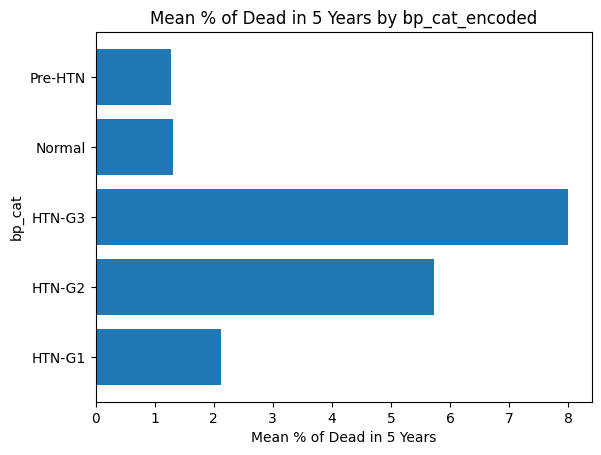

In [72]:
# Create a horizontal bar plot
plt.barh(grouped_data.index, grouped_data["dead_5y"])
plt.xlabel("Mean % of Dead in 5 Years")
plt.ylabel("bp_cat")
plt.title("Mean % of Dead in 5 Years by bp_cat_encoded")
plt.yticks(grouped_data.index)
plt.show()

8% of the people with HTN-G3 died.

In [73]:
len(dataset[dataset["bp_cat"] == "HTN-G3"])

75

In [74]:
len(dataset[(dataset["bp_cat"] == "HTN-G3") & (dataset["dead_5y"] == 1)])

6

6/75 people died from HTN-G3

In [75]:
d = dataset.copy()
# Create a mapping dictionary from unique values to integer labels
mapping = {cat: label for label, cat in enumerate(bp_cat_values)}

# Use the .map() function to create a new column with encoded labels
d["bp_cat_encoded"] = d["bp_cat"].map(mapping)


d_corr = d.corr(numeric_only=True)

In [76]:
pd.DataFrame(d_corr["bp_cat_encoded"]).abs().sort_values(by="bp_cat_encoded", ascending = False)


,bp_cat_encoded
bp_cat_encoded,1.000000
bp_sys,0.752876
bp_dias,0.618577
framingham_cvd,0.270516
HTN,0.231192
cardiovascular_meds,0.179800
weigh,0.176555
BMI,0.169625
ACR,0.101056
proteinuria,0.093368


We got a connection between bp_sys and bp_dias

### result hypo 10:
we found a strong connection between bp_cat to bp_sys and to bp_dias and to dead_5y.<br>
bp_cat is definetly a value that we want to keep

# Part 3 - preprocess the data

## Categorized the features to normal and abnormal

In [77]:
def categorize_features(data, features=None, normal=None, dangerous=None):
    data = pd.DataFrame(data, columns=features)
    for i, feature in enumerate(features):
        data.loc[:, f"{feature}_cat"] = 0
        data.loc[data[feature] > dangerous[i], f"{feature}_cat"] = 2
        data.loc[(data[feature] <= dangerous[i]) & (data[feature] > normal[i]), f"{feature}_cat"] = 1
                
        data = data.drop(feature, axis= 1)
    return data

In [78]:
dataset.columns.values

array(['age', 'sex', 'marital_status', 'ses', 'residence_cd', 'residence',
       'weigh', 'heigh', 'BMI', 'bp_sys', 'bp_dias', 'bp_cat', 'smoking',
       'smoking_status', 'HbA1c', 'glucose', 'creatinin', 'albumin',
       'alb24h', 'ACR', 'cholesterol_total', 'LDL', 'HDL',
       'triglycerides', 'TSH', 'gravity_u', 'nitrites_u', 'leuko_u',
       'proteinuria', 'WBC', 'RBC', 'platelets', 'MCV', 'MPV', 'Charlson',
       'framingham_cvd', 'antidiabetics', 'ERD', 'CVD', 'HTN', 'cancer',
       'cardiovascular_meds', 'statines', 'immigrant', 'dead_5y'],
      dtype=object)

In [79]:
def encode_features(dataset, features=None):
    dataset = dataset.copy()
    for feature in features:
        values = dataset[feature].unique()
        # Create a mapping dictionary from unique values to integer labels
        mapping = {val: label for label, val in enumerate(values)}

        # Use the .map() function to create a new column with encoded labels
        dataset[f"{feature}_encoded"] = dataset[feature].map(mapping)
        
        dataset = dataset.drop(feature, axis= 1)
    return dataset

In [80]:
to_delete.append("residence")

In [81]:
to_delete.append("smoking_status")
to_delete.append("marital_status")
to_delete.append("alb24h")

In [82]:
to_delete

['cancer',
 'weigh',
 'heigh',
 'ses',
 'bp_cat',
 'residence',
 'smoking_status',
 'marital_status',
 'alb24h']

In [83]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

**Note🔑:** We removed alb24h because we didn't have a lot of values and we didn't want to fill with median because it indicates a kidney disfunction and it can change the results dramatically. so we prefered to work without it.

In [84]:
from sklearn.preprocessing import FunctionTransformer

columns_to_process = dataset.columns.values.copy()
to_delete.append("age")
to_delete.append("sex")
columns_to_process = [item for item in columns_to_process if item not in to_delete]


columns_to_categorize= ["bp_sys", "bp_dias", "HbA1c", "glucose", "albumin", "gravity_u", "MCV", "MPV"]

normalvalues = [120, 80, 5.7, 100, 30, 1.03, 150, 100, 0, 0]
dangerousvalues = [140, 90, 6.4, 126, 300, 9999, 500.0, 9999, 4, 4]

categorization_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('categorize', FunctionTransformer(categorize_features, validate=False,
                                        kw_args={"features": columns_to_categorize, "normal": normalvalues, "dangerous": dangerousvalues}))
])



In [85]:
columns_to_normalize = ["cholesterol_total", "LDL", "HDL", "triglycerides", "BMI", "creatinin", "ACR", "TSH", "nitrites_u", "leuko_u", 'RBC',"platelets", "proteinuria", "WBC"]

# Define a pipeline
num_pipeline_normalization = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        ('minmax', MinMaxScaler())
])

In [86]:
from sklearn.preprocessing import FunctionTransformer

columns_to_encoding = ["bp_cat", "marital_status"]

# Define a pipeline
encoding_pipeline = Pipeline([
        ('encoding', FunctionTransformer(encode_features, validate=False,
                                 kw_args={"features": columns_to_encoding }))
])

In [87]:
class PassthroughTransformer:
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X

passthrough_pipeline = Pipeline([
    ('passthrough', PassthroughTransformer())
])

In [88]:
from sklearn.compose import ColumnTransformer
columns_to_leave_unchanged = ["age", "sex", "ses"]


# Combine all pipelines into a full pipeline
full_pipeline = ColumnTransformer([
    ("encoding", encoding_pipeline, columns_to_encoding),
    ("normalization", num_pipeline_normalization, columns_to_normalize),
    ("categorization", categorization_pipeline, columns_to_categorize),
    ("passthrough", passthrough_pipeline, columns_to_leave_unchanged)
])

In [89]:
dataset_prepared = full_pipeline.fit_transform(dataset)

In [90]:
pd.DataFrame(dataset_prepared, columns=columns_to_encoding+columns_to_normalize+ columns_to_categorize+ columns_to_leave_unchanged).describe().T

,count,mean,std,min,25%,50%,75%,max
bp_cat,12438.0,0.716836,1.072461,0.0,0.000000,0.000000,1.000000,4.0
marital_status,12438.0,0.686364,0.463989,0.0,0.000000,1.000000,1.000000,1.0
cholesterol_total,12438.0,0.253254,0.088856,0.0,0.192560,0.245077,0.306346,1.0
LDL,12438.0,0.337792,0.150939,0.0,0.233182,0.323636,0.429091,1.0
HDL,12438.0,0.250370,0.082312,0.0,0.192000,0.240000,0.296000,1.0
triglycerides,12438.0,0.052068,0.045095,0.0,0.026923,0.042012,0.063018,1.0
BMI,12438.0,0.201629,0.080989,0.0,0.145562,0.191324,0.245236,1.0
creatinin,12438.0,0.058083,0.038847,0.0,0.044384,0.054348,0.066123,1.0
ACR,12438.0,0.023905,0.075248,0.0,0.002676,0.004684,0.012044,1.0
TSH,12438.0,0.061349,0.028016,0.0,0.045997,0.056218,0.069847,1.0


# Part 4 - Dimensionality Reduction

We have 27 rows in our data and now we would like to reduce the dimension of the data in order to run the ML algorithm faster and better.

In [91]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=3)
for train_index, test_index in split.split(dataset, dataset["dead_5y"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

print(strat_train_set["dead_5y"].value_counts(normalize = True))
print(strat_test_set["dead_5y"].value_counts(normalize = True))

dead_5y
0    0.984121
1    0.015879
Name: proportion, dtype: float64
dead_5y
0    0.984325
1    0.015675
Name: proportion, dtype: float64


We have splitted the dataset to train and test using stratified shuffle split to save the proportions of the dead_5y.

In [92]:
combined = [strat_train_set, strat_test_set]
combined_target = []
for data in combined:
    combined_target.append(data.pop("dead_5y"))

preprocess the data using the full_pipeline

In [93]:
combined_prepared = []
combined_prepared.append(full_pipeline.fit_transform(combined[0]))
combined_prepared.append(full_pipeline.transform(combined[1]))

In [94]:
pd.DataFrame(combined_prepared[0])

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.117830,0.150000,0.243902,0.014473,0.198847,0.027174,0.019397,0.056218,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,38.0,2.0,2.0
1,1.0,0.0,0.102045,0.080455,0.105691,0.077793,0.196464,0.090580,0.001338,0.057922,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,47.0,1.0,2.0
2,0.0,0.0,0.383059,0.478182,0.252033,0.099502,0.198721,0.055254,0.003345,0.023850,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,41.0,1.0,2.0
3,2.0,0.0,0.419520,0.072727,0.186992,0.234735,0.194835,0.046196,0.008698,0.093697,...,2.0,2.0,1.0,0.0,1.0,0.0,0.0,47.0,2.0,1.0
4,0.0,0.0,0.193419,0.177273,0.138211,0.103121,0.165120,0.028080,0.051520,0.109029,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,45.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9945,0.0,0.0,0.144509,0.258182,0.162602,0.034826,0.251128,0.040761,0.004684,0.069847,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.0,2.0,3.0
9946,1.0,0.0,0.202312,0.245455,0.268293,0.052465,0.123119,0.056159,0.000294,0.051107,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,44.0,2.0,3.0
9947,0.0,0.0,0.205202,0.277273,0.349593,0.024423,0.127382,0.043478,0.002389,0.073254,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,35.0,1.0,1.0
9948,0.0,0.0,0.249000,0.395000,0.406504,0.029851,0.076354,0.053442,0.005634,0.056218,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,2.0,1.0


In [95]:
from sklearn.decomposition import PCA

num_components = 2  # You can adjust this based on your needs
pca = PCA(n_components=num_components)

combined_after_pca_preprocessed = []

# Fit and transform the data using PCA
combined_after_pca_preprocessed.append(pca.fit_transform(combined_prepared[0])) 
combined_after_pca_preprocessed.append(pca.transform(combined_prepared[1])) 

# Create a new DataFrame with the PCA results
pca_columns = [f"PC{i+1}" for i in range(num_components)]
pca_df = pd.DataFrame(data=combined_after_pca_preprocessed[0], columns=pca_columns)

# Now pca_df contains the reduced-dimension representation of your data
print(pca_df)

           PC1       PC2
0     5.519727 -0.939177
1    -3.502072  0.205602
2     2.510879 -0.726690
3    -3.525260  2.237836
4    -1.490948 -0.411490
...        ...       ...
9945 -4.491862 -0.613727
9946 -0.521249  0.507879
9947  8.522124 -0.810326
9948  2.527291 -0.742431
9949  0.475168  1.687135

[9950 rows x 2 columns]


After with have done PCA and we have preprocessed the data we can start building a model.

# Part 5 - Running a ML model

In [96]:
from sklearn.svm import SVC  # You can replace this with your chosen algorithm
from sklearn import metrics

model = SVC()  # Support Vector Classifier, replace with your chosen algorithm
model.fit(combined_after_pca_preprocessed[0], combined_target[0])

# Make predictions
y_pred = model.predict(combined_after_pca_preprocessed[1])
cnf_matrix = metrics.confusion_matrix(combined_target[1], y_pred)
cnf_matrix

array([[2449,    0],
       [  39,    0]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

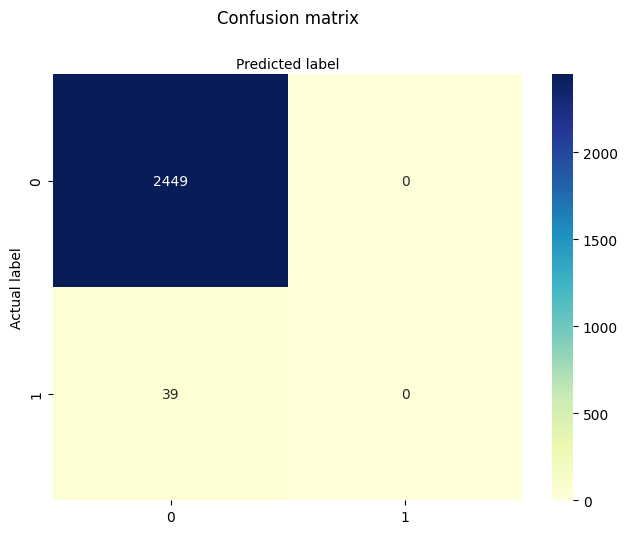

In [97]:
#visualizing code for confusion matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Not surprsingly, the model did not predicted that no one died. 
Let's try a different model on the data that we didn't run a PCA.

In [98]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()  # Support Vector Classifier, replace with your chosen algorithm
model.fit(combined_prepared[0], combined_target[0])

# Make predictions
y_pred = model.predict(combined_prepared[1])
cnf_matrix = metrics.confusion_matrix(combined_target[1], y_pred)
cnf_matrix

array([[2449,    0],
       [  39,    0]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

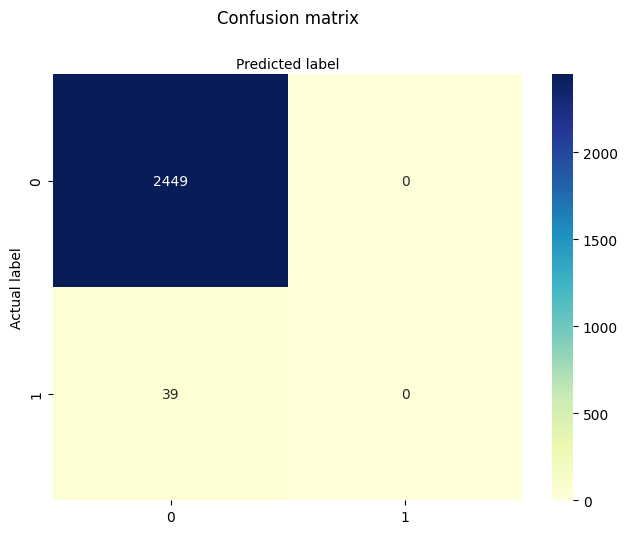

In [99]:
#visualizing code for confusion matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Again, the models did not work. That's because most of the data is people who survived.<br>
There are 2 options to solve this:
1. clean more the data.
2. different algorithm.

In [100]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()  # Support Vector Classifier, replace with your chosen algorithm
model.fit(combined_after_pca_preprocessed[0], combined_target[0])

# Make predictions
y_pred = model.predict(combined_after_pca_preprocessed[1])
cnf_matrix = metrics.confusion_matrix(combined_target[1], y_pred)
cnf_matrix

array([[2422,   27],
       [  39,    0]], dtype=int64)

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()  # Support Vector Classifier, replace with your chosen algorithm
model.fit(combined_after_pca_preprocessed[0], combined_target[0])

# Make predictions
y_pred = model.predict(combined_after_pca_preprocessed[1])
cnf_matrix = metrics.confusion_matrix(combined_target[1], y_pred)
cnf_matrix

array([[2438,   11],
       [  39,    0]], dtype=int64)

We ran 4 different models. We have a lot of errors and the models are not predicting well the test dataset. Maybe we came to overfit.

# Part 6 - Trying to come up with better model and data

We will try a few methods:
1. Oversampling.
2. Removing close rows using a norm.
3. Removing some of the training data so we won't overfit.
4. Building a neural network.

We will start with plotting the data of the PCA to look for insights.

In [102]:
mask = combined_target[0] == 1

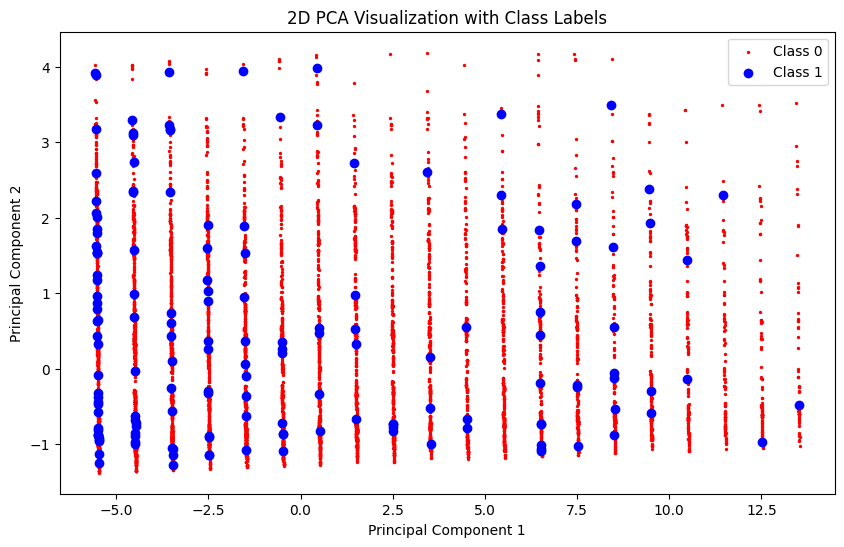

In [103]:
plt.figure(figsize=(10, 6))
pca_result = combined_after_pca_preprocessed[0]

plt.scatter(
    pca_result[~mask, 0], pca_result[~mask, 1], label='Class 0', c='red', s=2
)
plt.scatter(
    pca_result[mask, 0], pca_result[mask, 1], label='Class 1', c='blue'
)


plt.title('2D PCA Visualization with Class Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

We can clearly see that the PCA didn't work as we wanted so we cannot use it.<br>
We will use the combined_prepared

## Method 1 : Oversampling

In [104]:
from imblearn.over_sampling import RandomOverSampler

oversampled_data = combined_prepared[0].copy()
y = combined_target[0].copy()

# Create the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data
X_train_overresampled, y_train_overresampled = ros.fit_resample(oversampled_data, y)

In [105]:
X_train_overresampled.shape

(19584, 27)

In [106]:
y_train_overresampled.value_counts()

dead_5y
0    9792
1    9792
Name: count, dtype: int64

In [107]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)  # Support Vector Classifier, replace with your chosen algorithm
model.fit(X_train_overresampled, y_train_overresampled)

# Make predictions
y_pred = model.predict(combined_prepared[1])
cnf_matrix = metrics.confusion_matrix(combined_target[1], y_pred)
cnf_matrix

array([[2449,    0],
       [  39,    0]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

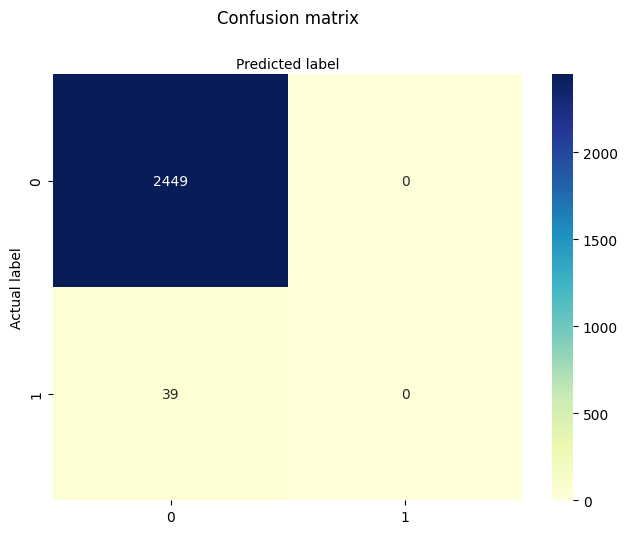

In [108]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Oversampling methods didn't work.

## Method 2: Undersapmling

In [109]:
from imblearn.under_sampling import RandomUnderSampler
oversampled_data = combined_prepared[0].copy()
y = combined_target[0].copy()

sampling_strategy = {0: 2500}

# Initialize the RandomUnderSampler with custom sampling_strategy
under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)


# Resample the training data
X_train_resampled, y_train_resampled = under_sampler.fit_resample(oversampled_data, y)

In [110]:
X_train_resampled.shape

(2658, 27)

In [111]:
y_train_resampled.value_counts()

dead_5y
0    2500
1     158
Name: count, dtype: int64

In [112]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()  # Support Vector Classifier, replace with your chosen algorithm
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(combined_prepared[1])
cnf_matrix = metrics.confusion_matrix(combined_target[1], y_pred)
cnf_matrix

array([[2446,    3],
       [  39,    0]], dtype=int64)

under sampling seems to not work very good.

**Note🔑:** We tried undersampling and oversampling with the data. We didn't got a good predicition. <br>
We will 2 more things, removing features and building a neural network.

## Method 3: Neural Network

In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

We tried 2 Neural networks models, We didn't came up with good results. The model still did not predicted the target value.

In [114]:
num_pipeline_normalization = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('minmax', MinMaxScaler())
])

In [115]:
full_pipeline_without_categorization = ColumnTransformer([
    ("encoding", encoding_pipeline, columns_to_encoding),
    ("normalization", num_pipeline_normalization, columns_to_normalize),
    ("categorization", categorization_pipeline, columns_to_categorize),
    ("passthrough", passthrough_pipeline, columns_to_leave_unchanged)
])

In [116]:
combined_prepared2= []
combined_prepared2.append(full_pipeline_without_categorization.fit_transform(combined[0]))
combined_prepared2.append(full_pipeline_without_categorization.transform(combined[1]))

In [117]:
from imblearn.over_sampling import RandomOverSampler

oversampled_data = combined_prepared2[0].copy()
y = combined_target[0].copy()

# Create the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data
X_train_overresampled2, y_train_overresampled2 = ros.fit_resample(oversampled_data, y)
X_train_overresampled2.shape

(19584, 27)

In [118]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()  # Support Vector Classifier, replace with your chosen algorithm
model.fit(X_train_overresampled2, y_train_overresampled2)

# Make predictions
y_pred = model.predict(combined_prepared[1])
cnf_matrix = metrics.confusion_matrix(combined_target[1], y_pred)
cnf_matrix

array([[2449,    0],
       [  39,    0]], dtype=int64)

In [119]:
pd.DataFrame(X_train_overresampled2).head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.117830,0.150000,0.243902,0.014473,0.198847,0.027174,0.019397,0.056218,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,38.0,2.0,2.0
1,1.0,0.0,0.102045,0.080455,0.105691,0.077793,0.196464,0.090580,0.001338,0.057922,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,47.0,1.0,2.0
2,0.0,0.0,0.383059,0.478182,0.252033,0.099502,0.198721,0.055254,0.003345,0.023850,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,41.0,1.0,2.0
3,2.0,0.0,0.419520,0.072727,0.186992,0.234735,0.194835,0.046196,0.008698,0.093697,...,2.0,2.0,1.0,0.0,1.0,0.0,0.0,47.0,2.0,1.0
4,0.0,0.0,0.193419,0.177273,0.138211,0.103121,0.165120,0.028080,0.051520,0.109029,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,45.0,2.0,1.0


In [120]:
from imblearn.over_sampling import RandomOverSampler

# Create the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data
X_train_resampled_oversameled, y_train_resampled_oversameled = ros.fit_resample(X_train_resampled, y_train_resampled)
X_train_2500, y_train_2500 = X_train_resampled_oversameled, y_train_resampled_oversameled

In [121]:
X_train_resampled_oversameled.shape

(5000, 27)

In [122]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()  # Support Vector Classifier, replace with your chosen algorithm
model.fit(X_train_resampled_oversameled, y_train_resampled_oversameled)

# Make predictions
y_pred = model.predict(combined_prepared[1])
cnf_matrix = metrics.confusion_matrix(combined_target[1], y_pred)
cnf_matrix

array([[2445,    4],
       [  39,    0]], dtype=int64)

# Steps we go forward to improve the results:
1. Trying to do onehotencoding to the categorical data instead of the pipeline we have, just create another time the full pipline but change the encoding labels to onehot using the builded function.
2. Try to plot some boxplots of all the data and get known with the outliers, maybe they are causing over fitting, maybe we should try deleting somedata with a custom function that calculates distances with a norm and delete data that is lower than ${\epsilon}$
3. delete rows that are unnecessary and preprocess the data in another way maybe do not categorize and one hot it at all and just normalize it.
4. Talk with the others and maybe come up with combining a startegy of them but with a twist of us.

## 1. trying to use KNN algorithm, maybe it will work ? 

In [123]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(combined_prepared[0], combined_target[0])

# Make predictions
y_pred = model.predict(combined_prepared[1])
cnf_matrix = metrics.confusion_matrix(combined_target[1], y_pred)
cnf_matrix

array([[2449,    0],
       [  39,    0]], dtype=int64)

Let's try it again on the oversampled dataset.

In [124]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train_2500, y_train_2500)

# Make predictions
y_pred = model.predict(combined_prepared[1])
cnf_matrix = metrics.confusion_matrix(combined_target[1], y_pred)
cnf_matrix

array([[2140,  309],
       [  27,   12]], dtype=int64)

In [125]:
from sklearn.metrics import recall_score

recall = recall_score(combined_target[1], y_pred)
recall

0.3076923076923077

We were correct with 12 and we missed 27.<br>
There is a trade-off here: we need to determine which of the errors we want to decrease. We think that we need to minimize the FN error which means Recall function.<br>
Let's try performing 5 cross validation to ensure the models predictions.

In [126]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train_2500, y_train_2500, cv=5, scoring="recall")

array([1., 1., 1., 1., 1.])

We get all 1's because the dataset is unbalanced so we cannot come up with a conclusion.<br>
Let's try plotting the roc curve

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider i

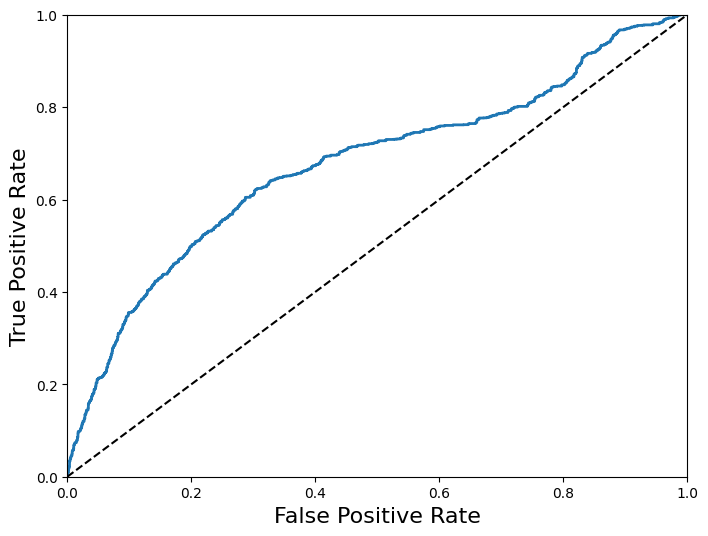

In [127]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=10, tol=-0, random_state=42)


y_scores = cross_val_predict(sgd_clf, X_train_2500, y_train_2500, cv=5,
                             method="decision_function")


from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_2500, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [128]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_2500, y_scores)

0.6755791999999999

In ideal case, the AUC - area under the curve should be 1 or close to 1. <br> Ours is:0.6755791999999999
which is not very good.

## 2. Trying to do onehotencoding to the categorical data instead of the pipeline we have
just create another time the full pipline but change the encoding labels to onehot using the builded function

In [129]:
from sklearn.preprocessing import OneHotEncoder


one_hot_encoding_pipeline = Pipeline([
        ('onehot', OneHotEncoder())
])

full_pipeline_onehot = ColumnTransformer([
    ("one_hot_encoding", OneHotEncoder(sparse=False), columns_to_encoding),
    ("normalization", num_pipeline_normalization, columns_to_normalize),
    ("categorization", categorization_pipeline, columns_to_categorize),
    ("passthrough", passthrough_pipeline, columns_to_leave_unchanged)
])

In [130]:
X_train_oneHot = full_pipeline_onehot.fit_transform(combined[0])
X_test_oneHot = full_pipeline_onehot.transform(combined[1])
y_train_onehot, y_test_onehot = combined_target[0], combined_target[1]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [131]:
X_train_oneHot.shape

(9950, 32)

In [132]:
len(columns_to_encoding)

2

In [133]:
pd.DataFrame(X_train_oneHot).head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.117830,0.150000,0.243902,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,38.0,2.0,2.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.102045,0.080455,0.105691,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,47.0,1.0,2.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.383059,0.478182,0.252033,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,41.0,1.0,2.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.419520,0.072727,0.186992,...,2.0,2.0,1.0,0.0,1.0,0.0,0.0,47.0,2.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.193419,0.177273,0.138211,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,45.0,2.0,1.0


Now after the preprocessing let's try an algorithm:

In [134]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train_oneHot, y_train_onehot)

# Make predictions on the test set.
y_pred = clf.predict(X_test_oneHot)
cnf_matrix = metrics.confusion_matrix(y_test_onehot, y_pred)
cnf_matrix

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2447,    2],
       [  39,    0]], dtype=int64)

In [135]:
# random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_oneHot, y_train_onehot)

# Make predictions on the test set.
y_pred = clf.predict(X_test_oneHot)
cnf_matrix = metrics.confusion_matrix(y_test_onehot, y_pred)
cnf_matrix

array([[2449,    0],
       [  39,    0]], dtype=int64)

In [136]:
# SVM
from sklearn.svm import SVC

clf = SVC(random_state=42)
clf.fit(X_train_oneHot, y_train_onehot)

# Make predictions on the test set.
y_pred = clf.predict(X_test_oneHot)
cnf_matrix = metrics.confusion_matrix(y_test_onehot, y_pred)
cnf_matrix

array([[2449,    0],
       [  39,    0]], dtype=int64)

In [137]:
# Perceptron
from sklearn.linear_model import Perceptron

clf = Perceptron(random_state=42)
clf.fit(X_train_oneHot, y_train_onehot)

# Make predictions on the test set.
y_pred = clf.predict(X_test_oneHot)
cnf_matrix = metrics.confusion_matrix(y_test_onehot, y_pred)
cnf_matrix

array([[2449,    0],
       [  39,    0]], dtype=int64)

Nothing worked :(

Let's try the same on the X_train_2500 data

In [138]:
from imblearn.under_sampling import RandomUnderSampler
X_train = combined[0].copy()
y_train = combined_target[0].copy()

sampling_strategy = {0: 2500}

# Initialize the RandomUnderSampler with custom sampling_strategy
X_train_underSampling = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)


# Resample the training data
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)

In [139]:
from imblearn.over_sampling import RandomOverSampler

# Create the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data
X_train_overresampled2, y_train_overresampled2 = ros.fit_resample(X_train_resampled, y_train_resampled)
X_train_overresampled2.shape

(5000, 44)

In [140]:
pd.DataFrame(X_train_overresampled2).head().T

,0,1,2,3,4
age,48,46,49,46,49
sex,2,1,2,2,2
marital_status,M,M,U,U,U
ses,1,1,1,1,3
residence_cd,1,1,1,1,1
residence,urban,urban,urban,urban,urban
weigh,62.0,96.0,70.0,73.0,58.0
heigh,152.0,185.0,157.0,167.0,148.0
BMI,26.84,28.05,28.4,26.18,26.94
bp_sys,113,143,110,122,155


Now let's preprocess the data

In [141]:
X_train_oneHot = full_pipeline_onehot.fit_transform(X_train_overresampled2)
X_test_oneHot = full_pipeline_onehot.transform(combined[1])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [142]:
pd.DataFrame(X_train_oneHot).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
 3   3       5000 non-null   float64
 4   4       5000 non-null   float64
 5   5       5000 non-null   float64
 6   6       5000 non-null   float64
 7   7       5000 non-null   float64
 8   8       5000 non-null   float64
 9   9       5000 non-null   float64
 10  10      5000 non-null   float64
 11  11      5000 non-null   float64
 12  12      5000 non-null   float64
 13  13      5000 non-null   float64
 14  14      5000 non-null   float64
 15  15      5000 non-null   float64
 16  16      5000 non-null   float64
 17  17      5000 non-null   float64
 18  18      5000 non-null   float64
 19  19      5000 non-null   float64
 20  20      5000 non-null   float64
 21  21      5000 non-null   float64
 22  

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

clf = LogisticRegression(random_state=42)
clf.fit(X_train_oneHot, y_train_overresampled2)

# Make predictions on the test set.
y_pred = clf.predict(X_test_oneHot)
cnf_matrix = metrics.confusion_matrix(y_test_onehot, y_pred)
cnf_matrix

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[1700,  749],
       [  12,   27]], dtype=int64)

In [144]:
from sklearn.metrics import recall_score

recall = recall_score(y_test_onehot, y_pred)
recall

0.6923076923076923

Now we have found 27 that's better but we have a very large FP.

In [145]:
from sklearn.svm import SVC

clf = SVC(random_state=42)
clf.fit(X_train_oneHot, y_train_overresampled2)

# Make predictions on the test set.
y_pred = clf.predict(X_test_oneHot)
cnf_matrix = metrics.confusion_matrix(y_test_onehot, y_pred)
cnf_matrix

array([[1644,  805],
       [  11,   28]], dtype=int64)

In [146]:
recall = recall_score(y_test_onehot, y_pred)
recall

0.717948717948718

In [147]:
from sklearn.metrics import classification_report


# Generate a classification report
report = classification_report(y_test_onehot, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.99      0.67      0.80      2449
           1       0.03      0.72      0.06        39

    accuracy                           0.67      2488
   macro avg       0.51      0.69      0.43      2488
weighted avg       0.98      0.67      0.79      2488



In [148]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_onehot, y_pred)
f1

0.06422018348623852

The previous one was a little better.

In [149]:
from sklearn.linear_model import Perceptron

clf = Perceptron(random_state=42)
clf.fit(X_train_oneHot, y_train_overresampled2)

# Make predictions on the test set.
y_pred = clf.predict(X_test_oneHot)
cnf_matrix = metrics.confusion_matrix(y_test_onehot, y_pred)
cnf_matrix

array([[1610,  839],
       [  11,   28]], dtype=int64)

Same

In [150]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_oneHot, y_train_overresampled2)

# Make predictions on the test set.
y_pred = clf.predict(X_test_oneHot)
cnf_matrix = metrics.confusion_matrix(y_test_onehot, y_pred)
cnf_matrix

array([[2445,    4],
       [  38,    1]], dtype=int64)

In [151]:
recall = recall_score(y_test_onehot, y_pred)
recall

0.02564102564102564

Random forest did not work.

In [152]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train_oneHot, y_train_overresampled2)

# Make predictions on the test set.
y_pred = clf.predict(X_test_oneHot)
cnf_matrix = metrics.confusion_matrix(y_test_onehot, y_pred)
cnf_matrix

array([[2162,  287],
       [  22,   17]], dtype=int64)

KNN worked pretty good.

### Conclusion:
We have done One Hot Encoding and normalization and standrization to the data and we got interesting results. We found the with one hot encoding we are getting recall of 0.71 and that's pretty good compared to other models.

We will work on the data: X_train_oneHot, y_train_overresampled2, X_test_oneHot, y_test_onehot

Let's try doing the naive bayes algorithm.

In [153]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train_oneHot, y_train_overresampled2)

# Make predictions on the test set.
y_pred = clf.predict(X_test_oneHot)
cnf_matrix = metrics.confusion_matrix(y_test_onehot, y_pred)
cnf_matrix

array([[2178,  271],
       [  29,   10]], dtype=int64)

It did not work very good. Maybe it's because of the scales of the data.
<br> Let's run a pca to reduce dimensionality and then we will try some models again.<br>
We will start with onehot and then with the X_train_2500

In [154]:
from sklearn.decomposition import PCA

num_components = 3  # You can adjust this based on your needs
pca = PCA(n_components=num_components)

# Fit and transform the data using PCA
X_train_onehot_pca = pca.fit_transform(X_train_oneHot)
X_test_oneHot_pca = pca.transform(X_test_oneHot)

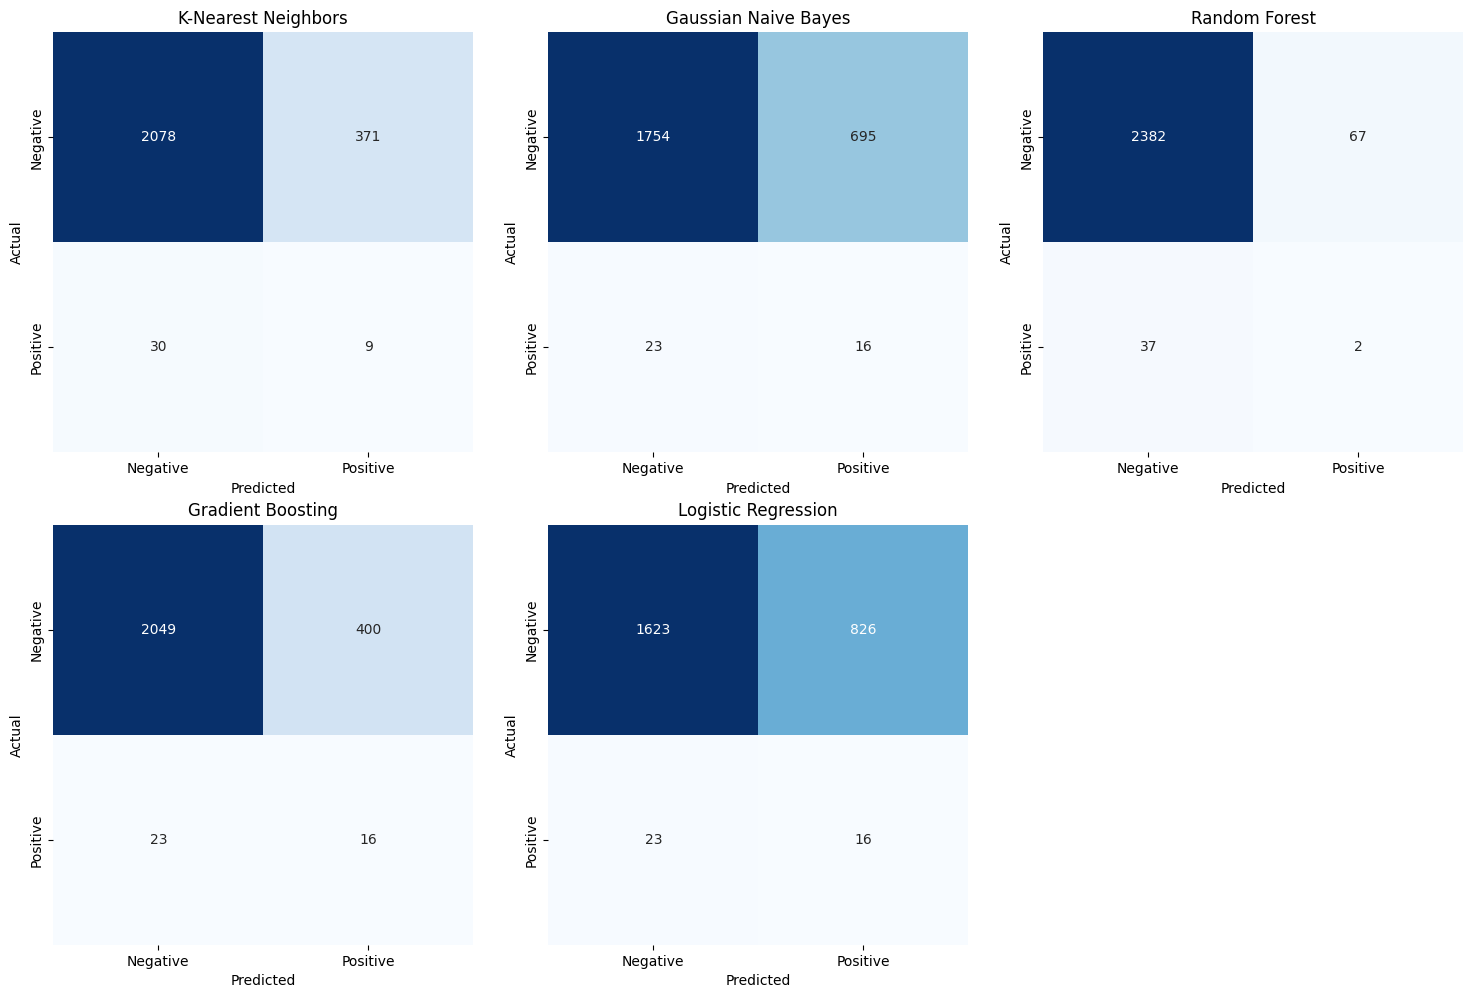

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Define the classifiers
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Initialize a figure for visualization
plt.figure(figsize=(15, 10))

# Train, evaluate, and visualize each classifier
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X_train_onehot_pca, y_train_overresampled2)  # Train the classifier
    y_pred = clf.predict(X_test_oneHot_pca)  # Make predictions
    
    cm = confusion_matrix(y_test_onehot, y_pred)
    
    # Plot the confusion matrix
    plt.subplot(2, 3, i + 1)
    plt.title(clf_name)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

Result: PCA is not good for us even though the gradient boosting worked a little but not very good.

In [156]:
from sklearn.decomposition import PCA

num_components = 3  # You can adjust this based on your needs
pca = PCA(n_components=num_components)

# Fit and transform the data using PCA
X_train_onehot_pca = pca.fit_transform(X_train_2500)
X_test_oneHot_pca = pca.transform(combined_prepared[1])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


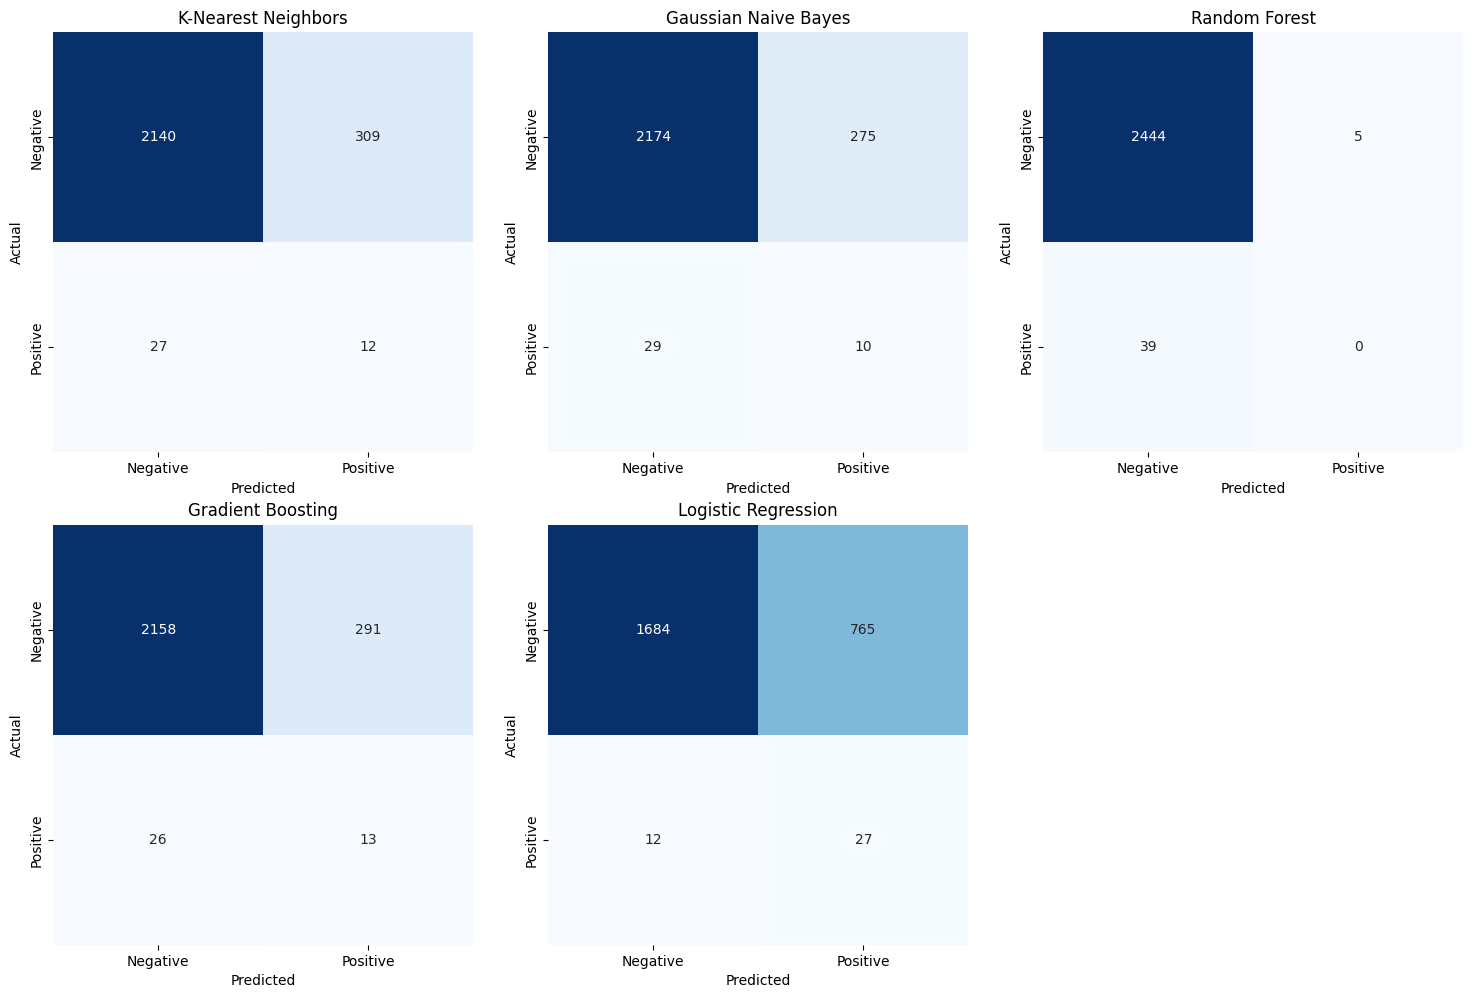

In [157]:
# Define the classifiers
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Initialize a figure for visualization
plt.figure(figsize=(15, 10))

# Train, evaluate, and visualize each classifier
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X_train_2500, y_train_2500)  # Train the classifier
    y_pred = clf.predict(combined_prepared[1])  # Make predictions
    
    cm = confusion_matrix(combined_target[1], y_pred)
    
    # Plot the confusion matrix
    plt.subplot(2, 3, i + 1)
    plt.title(clf_name)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


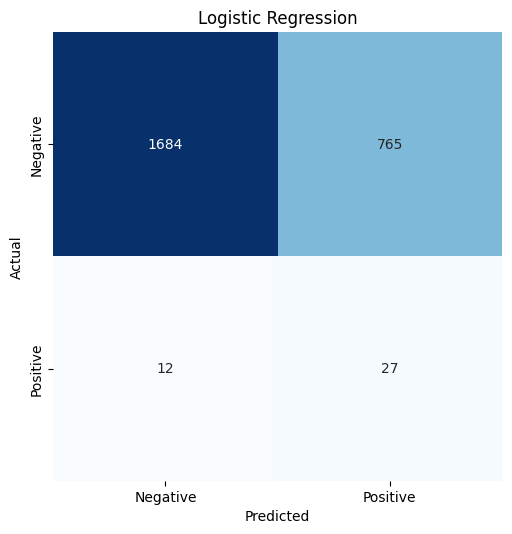

In [181]:

clf = LogisticRegression()
plt.figure(figsize=(15, 10))
clf.fit(X_train_2500, y_train_2500)  # Train the classifier
y_pred = clf.predict(combined_prepared[1])  # Make predictions

cm = confusion_matrix(combined_target[1], y_pred)

# Plot the confusion matrix
plt.subplot(2, 3, i + 1)
plt.title(clf_name)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
overall_accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", overall_accuracy)

Logistic regression worked similarly to what we came up with at earlier models.

# Removing Outliers
Maybe the models prediction are wrong because of the data diversity. Let's plot and check that.
We will work on the combined_prepared data

In [158]:
X_train, X_test = combined_prepared[0] , combined_prepared[1]
Y_train, Y_test = combined_target[0] , combined_target[1]
X_train = pd.DataFrame(X_train)

In [159]:
# Create a copy of X_train as filtered_X_train
filtered_X_train = X_train.loc[Y_train.reset_index(drop=True) == 0]
filtered_X_train_dead = X_train.loc[Y_train.reset_index(drop=True) == 1]

# Iterate through numerical columns in filtered_X_train and remove outliers for rows where Y_train is 1
numerical_columns = filtered_X_train.select_dtypes(include='number').columns
for column in numerical_columns:
    Q1 = filtered_X_train[column].quantile(0.25)
    Q3 = filtered_X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR
    lower_fence = Q1 - 1.5 * IQR
    filtered_X_train = filtered_X_train.loc[(filtered_X_train[column] >= lower_fence) & (filtered_X_train[column] <= upper_fence)]

In [160]:
filtered_X_train

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.117830,0.150000,0.243902,0.014473,0.198847,0.027174,0.019397,0.056218,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,38.0,2.0,2.0
5,0.0,0.0,0.376612,0.595455,0.317073,0.063772,0.150326,0.039855,0.000000,0.049404,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,47.0,2.0,1.0
16,0.0,0.0,0.271232,0.337273,0.154472,0.157847,0.119358,0.049819,0.002676,0.025554,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,36.0,1.0,1.0
18,0.0,1.0,0.142285,0.181818,0.284553,0.016282,0.183927,0.060688,0.002964,0.047700,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,44.0,2.0,2.0
20,0.0,0.0,0.310138,0.457273,0.195122,0.073722,0.341650,0.079710,0.004142,0.054514,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,45.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,0.0,0.0,0.166741,0.122727,0.162602,0.096789,0.291750,0.046196,0.002676,0.056218,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,44.0,2.0,1.0
9944,0.0,0.0,0.266341,0.354545,0.186992,0.098146,0.228937,0.048913,0.002567,0.069847,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,48.0,2.0,2.0
9946,1.0,0.0,0.202312,0.245455,0.268293,0.052465,0.123119,0.056159,0.000294,0.051107,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,44.0,2.0,3.0
9947,0.0,0.0,0.205202,0.277273,0.349593,0.024423,0.127382,0.043478,0.002389,0.073254,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,35.0,1.0,1.0


In [161]:
from sklearn.utils import shuffle
filtered_X_train["dead_5y"] =0
filtered_X_train_dead["dead_5y"] =1

# Concatenate the datasets
filtered_X_train = pd.concat([filtered_X_train, filtered_X_train_dead], axis=0)

# Shuffle the concatenated dataset
filtered_X_train = shuffle(filtered_X_train, random_state=42)  # You can change the random_state for different shuffling

# Reset the index if needed
filtered_X_train.reset_index(drop=True, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_21552\1457299454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_X_train_dead["dead_5y"] =1


In [162]:
filtered_X_train["dead_5y"].value_counts()

dead_5y
0    3723
1     158
Name: count, dtype: int64

Let's train and run a model

In [163]:
Y_train_without_outliers = filtered_X_train.pop("dead_5y")

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


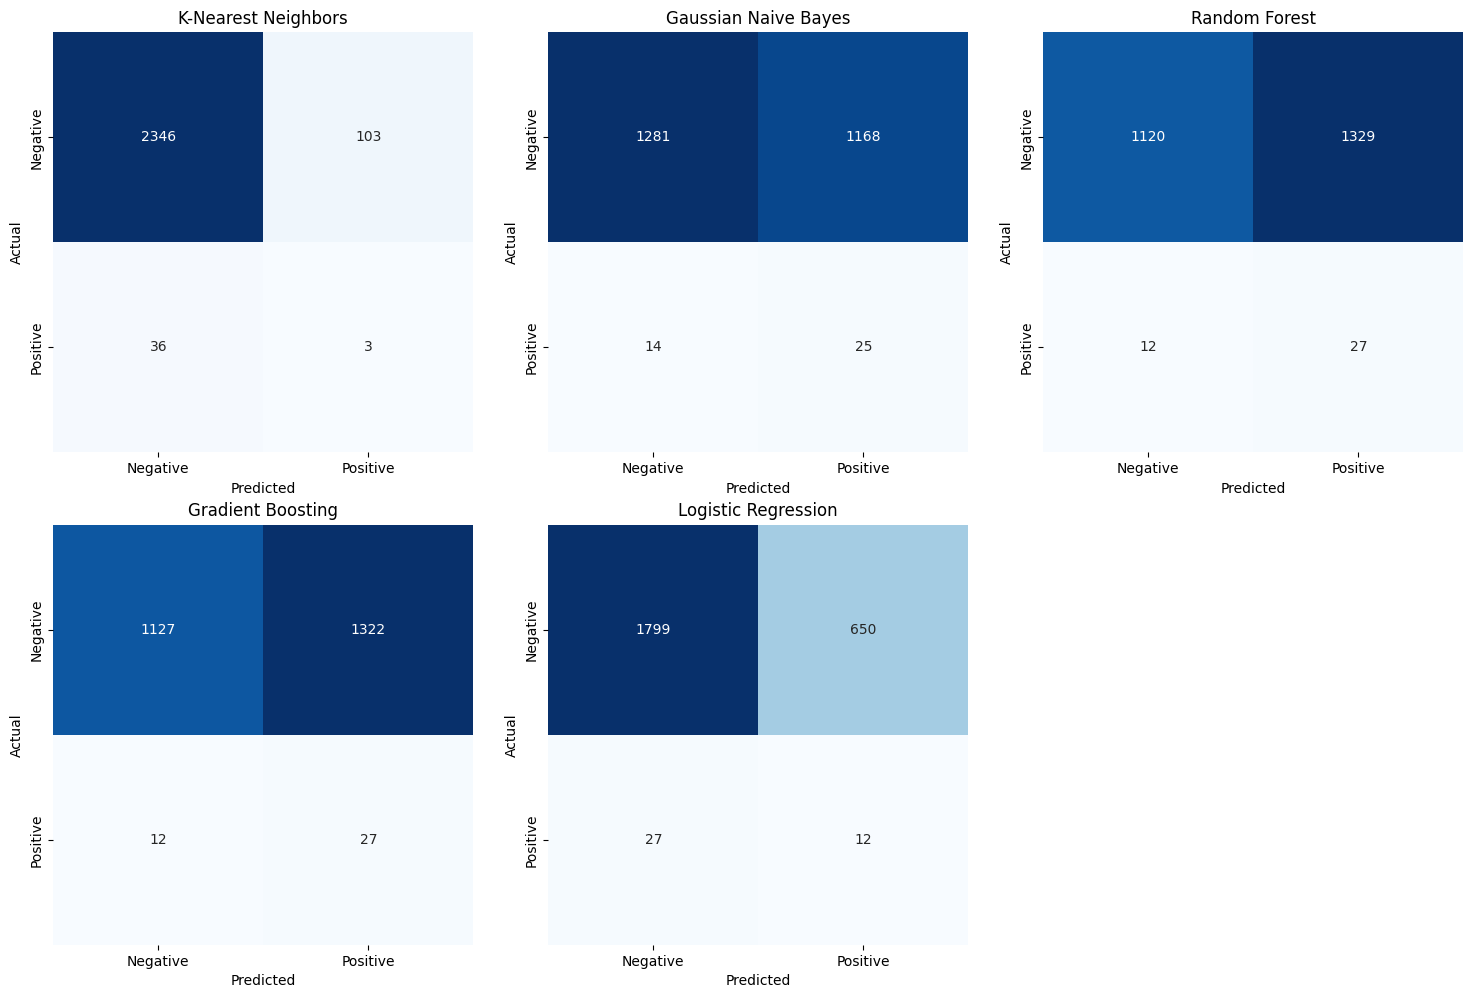

In [164]:
# Define the classifiers
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Initialize a figure for visualization
plt.figure(figsize=(15, 10))

# Train, evaluate, and visualize each classifier
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(filtered_X_train, Y_train_without_outliers)  # Train the classifier
    y_pred = clf.predict(X_test)  # Make predictions
    
    cm = confusion_matrix(Y_test, y_pred)
    
    # Plot the confusion matrix
    plt.subplot(2, 3, i + 1)
    plt.title(clf_name)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

We don't see any improvement.

Let's try clustering the data into classes and then we will run another code.

In [165]:
oversampled_data = filtered_X_train.copy()
y = Y_train_without_outliers.copy()

# Create the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data
X_train_without_outliers_oversampled, y_train_without_outliers_oversampled = ros.fit_resample(oversampled_data, y)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


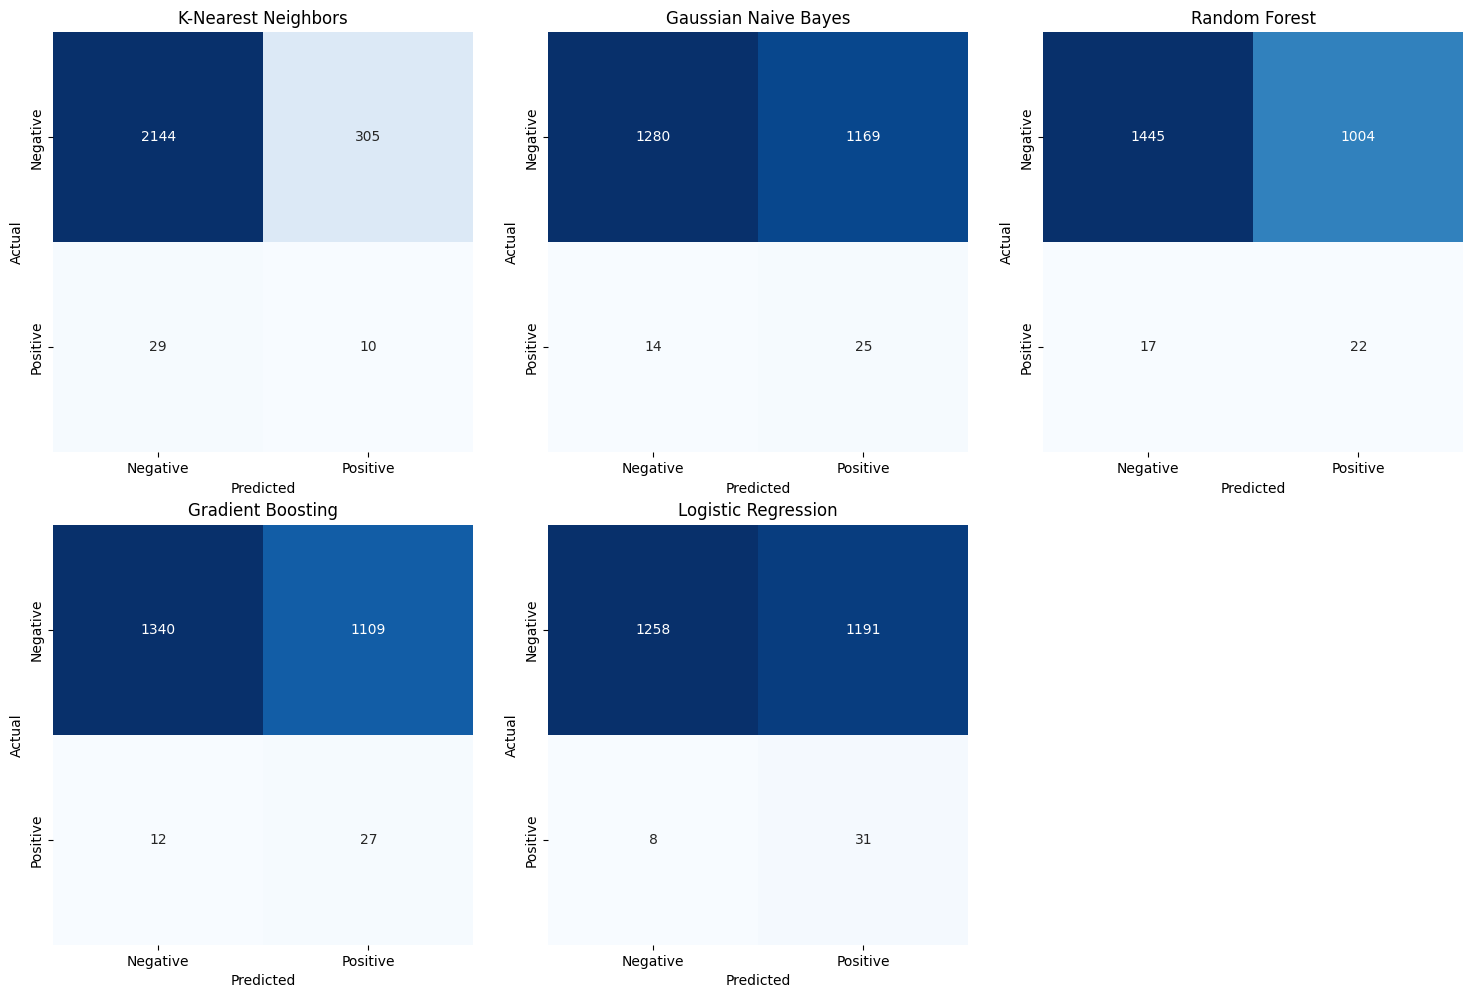

In [166]:
# Define the classifiers
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Initialize a figure for visualization
plt.figure(figsize=(15, 10))

# Train, evaluate, and visualize each classifier
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X_train_without_outliers_oversampled, y_train_without_outliers_oversampled)  # Train the classifier
    y_pred = clf.predict(X_test)  # Make predictions
    
    cm = confusion_matrix(Y_test, y_pred)
    
    # Plot the confusion matrix
    plt.subplot(2, 3, i + 1)
    plt.title(clf_name)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

The logistic regression worked pretty well. Wow! Let's try imporving the model.

## Fine Tuning the model
We will try fine tuning the logistic regression model using the (X_train_without_outliers_oversampled, y_train_without_outliers_oversampled), (X_test, Y_test)

In [167]:
from sklearn.model_selection import cross_val_score
Log_reg = LogisticRegression()
scores = cross_val_score(Log_reg, X_train_without_outliers_oversampled, y_train_without_outliers_oversampled,
                         scoring="recall", cv=10)
scores

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

array([0.77419355, 0.76075269, 0.8172043 , 0.71045576, 0.73458445,
       0.72654155, 0.76075269, 0.70698925, 0.75537634, 0.77150538])

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, make_scorer, recall_score

# Define the Logistic Regression model
logistic_regression = LogisticRegression()

# Define hyperparameter grid for tuning
param_grid = {
    'penalty': ['l1', 'l2'],            # Regularization penalty ('l1' or 'l2')
    'C': [0.001, 0.01, 0.1, 1, 10],    # Inverse of regularization strength
}

# Define a custom scorer for recall
scorer = make_scorer(recall_score)

# Perform Grid Search Cross-Validation to find the best hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, n_jobs=-1, verbose=1, scoring=scorer)
grid_search.fit(X_train_without_outliers_oversampled, y_train_without_outliers_oversampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the Logistic Regression model with the best hyperparameters
best_logistic_regression = LogisticRegression(**best_params)
best_logistic_regression.fit(X_train_without_outliers_oversampled, y_train_without_outliers_oversampled)

# Make predictions on the test set
y_pred = best_logistic_regression.predict(X_test)

# Evaluate the model
print("Best Hyperparameters:", best_params)
print("Classification Report on Test Data:")
print(classification_report(Y_test, y_pred))
confusion_matrix(Y_test, y_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.99      0.52      0.68      2449
           1       0.03      0.79      0.05        39

    accuracy                           0.53      2488
   macro avg       0.51      0.66      0.37      2488
weighted avg       0.98      0.53      0.67      2488



C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

array([[1277, 1172],
       [   8,   31]], dtype=int64)

In [169]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
overall_accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", overall_accuracy)

Accuracy: 0.5257234726688103


We can see that there is a problem here: we have removed the outliers but now the model is kind of uniformly predicting whether a patient died or not. We will try doing the same but for data without categorization.

In [170]:
full_pipeline_normal = ColumnTransformer([
    ("encoding", encoding_pipeline, columns_to_encoding),
    ("normalization", num_pipeline_normalization, columns_to_normalize+columns_to_categorize),
    ("passthrough", passthrough_pipeline, columns_to_leave_unchanged)
])

In [171]:
X_train = full_pipeline_normal.fit_transform(combined[0])
X_test = full_pipeline_normal.transform(combined[1])

In [172]:
Y_train , Y_test = combined_target[0], combined_target[1]

In [173]:
X_train = pd.DataFrame(X_train)
# Create a copy of X_train as filtered_X_train
filtered_X_train = X_train.loc[Y_train.reset_index(drop=True) == 0]
filtered_X_train_dead = X_train.loc[Y_train.reset_index(drop=True) == 1]

# Iterate through numerical columns in filtered_X_train and remove outliers for rows where Y_train is 1
numerical_columns = filtered_X_train.select_dtypes(include='number').columns
for column in numerical_columns:
    Q1 = filtered_X_train[column].quantile(0.25)
    Q3 = filtered_X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR
    lower_fence = Q1 - 1.5 * IQR
    filtered_X_train = filtered_X_train.loc[(filtered_X_train[column] >= lower_fence) & (filtered_X_train[column] <= upper_fence)]

In [174]:
from sklearn.utils import shuffle
filtered_X_train["dead_5y"] =0
filtered_X_train_dead["dead_5y"] =1

# Concatenate the datasets
filtered_X_train = pd.concat([filtered_X_train, filtered_X_train_dead], axis=0)

# Shuffle the concatenated dataset
filtered_X_train = shuffle(filtered_X_train, random_state=42)  # You can change the random_state for different shuffling

# Reset the index if needed
filtered_X_train.reset_index(drop=True, inplace=True)
Y_train_without_outliers = filtered_X_train.pop("dead_5y")

C:\Users\User\AppData\Local\Temp\ipykernel_21552\514073529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_X_train_dead["dead_5y"] =1


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


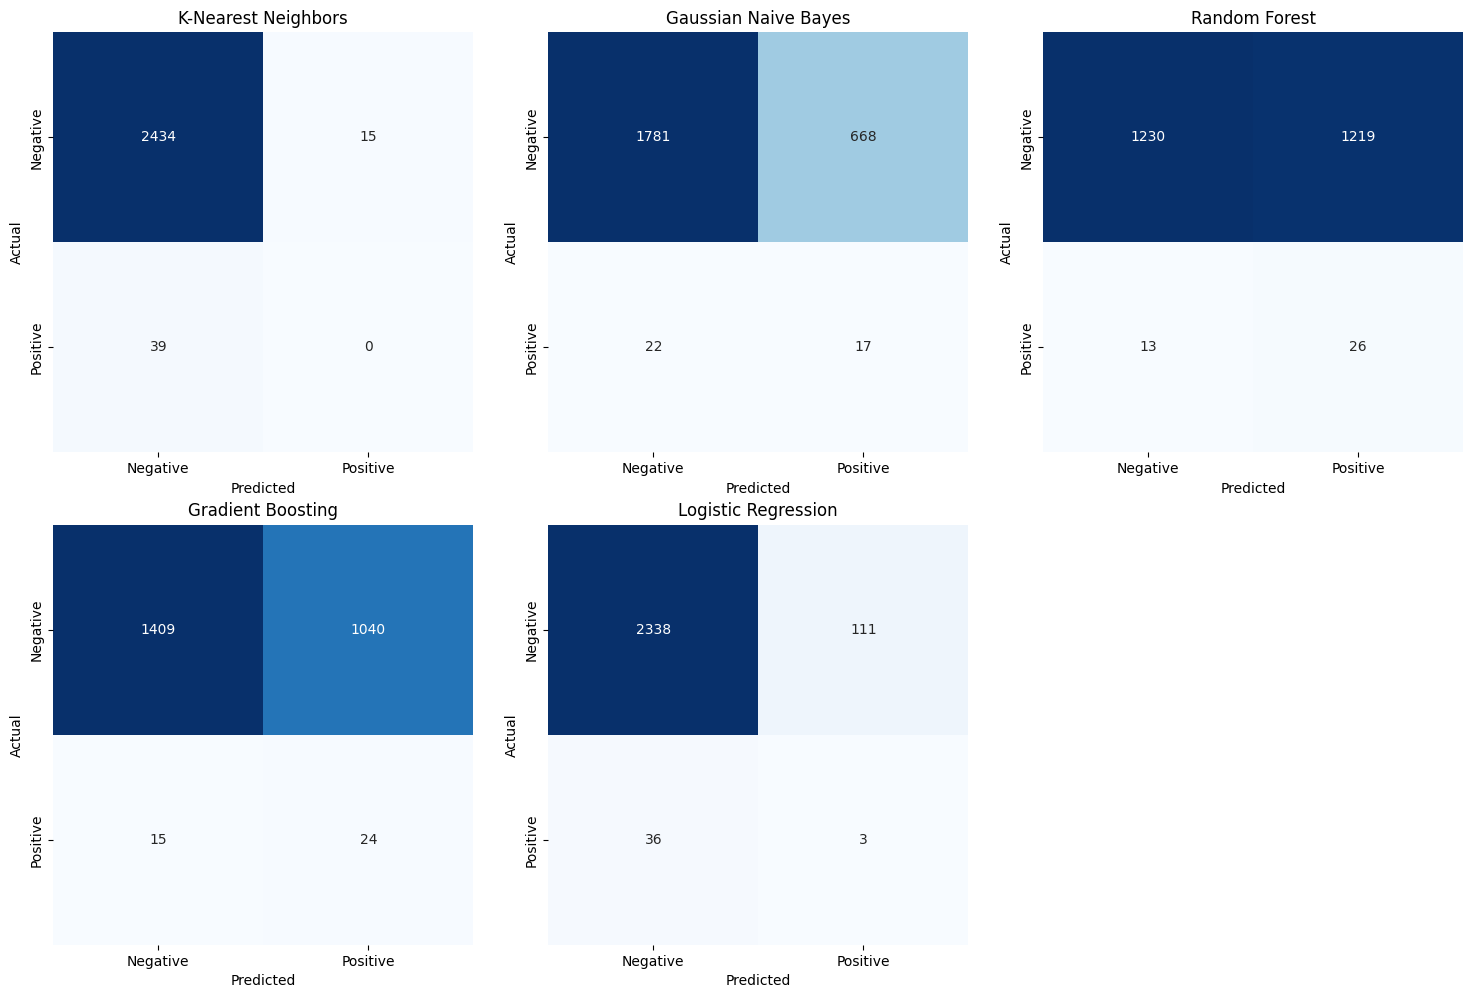

In [175]:
# Define the classifiers
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Initialize a figure for visualization
plt.figure(figsize=(15, 10))

# Train, evaluate, and visualize each classifier
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(filtered_X_train, Y_train_without_outliers)  # Train the classifier
    y_pred = clf.predict(X_test)  # Make predictions
    
    cm = confusion_matrix(Y_test, y_pred)
    
    # Plot the confusion matrix
    plt.subplot(2, 3, i + 1)
    plt.title(clf_name)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

In [176]:
oversampled_data = filtered_X_train.copy()
y = Y_train_without_outliers.copy()

# Create the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data
X_train_without_outliers_oversampled, y_train_without_outliers_oversampled = ros.fit_resample(oversampled_data, y)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


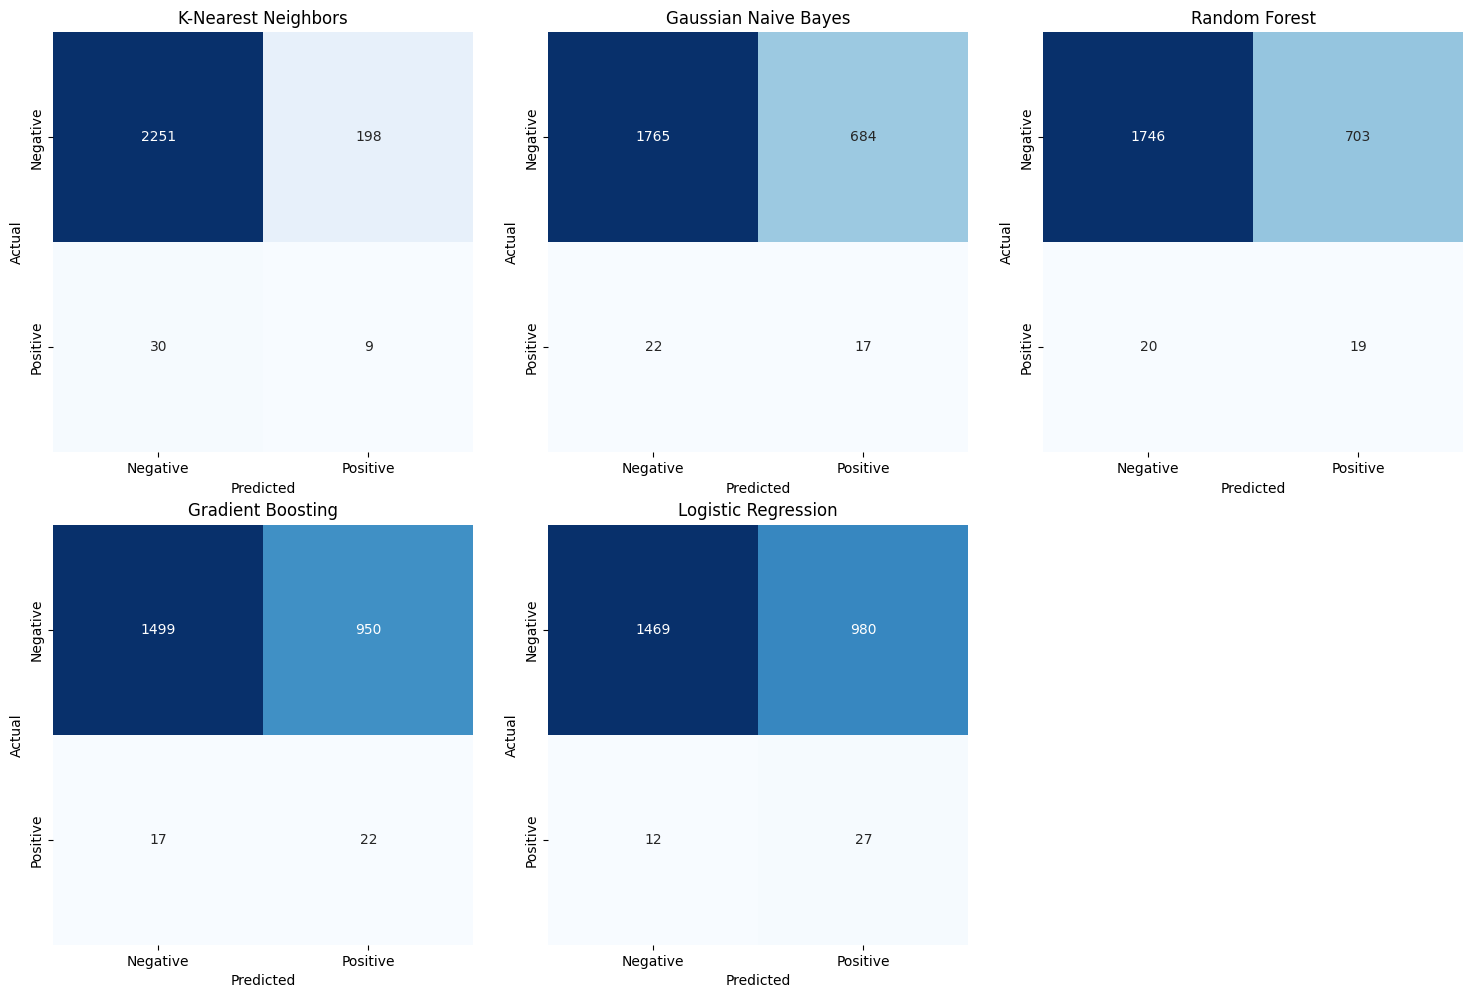

In [177]:
# Define the classifiers
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Initialize a figure for visualization
plt.figure(figsize=(15, 10))

# Train, evaluate, and visualize each classifier
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X_train_without_outliers_oversampled, y_train_without_outliers_oversampled)  # Train the classifier
    y_pred = clf.predict(X_test)  # Make predictions
    
    cm = confusion_matrix(Y_test, y_pred)
    
    # Plot the confusion matrix
    plt.subplot(2, 3, i + 1)
    plt.title(clf_name)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

In [178]:
from sklearn.model_selection import cross_val_score
Log_reg = LogisticRegression()
scores = cross_val_score(Log_reg, X_train_without_outliers_oversampled, y_train_without_outliers_oversampled,
                         scoring="recall", cv=10)
scores

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

array([0.73280423, 0.73544974, 0.81216931, 0.71693122, 0.76719577,
       0.73280423, 0.68435013, 0.73209549, 0.73280423, 0.74867725])

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, make_scorer, recall_score

# Define the Logistic Regression model
logistic_regression = LogisticRegression()

# Define hyperparameter grid for tuning
param_grid = {
    'penalty': ['l1', 'l2'],            # Regularization penalty ('l1' or 'l2')
    'C': [0.001, 0.01, 0.1, 1, 10],    # Inverse of regularization strength
}

# Define a custom scorer for recall
scorer = make_scorer(recall_score)

# Perform Grid Search Cross-Validation to find the best hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, n_jobs=-1, verbose=1, scoring=scorer)
grid_search.fit(X_train_without_outliers_oversampled, y_train_without_outliers_oversampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the Logistic Regression model with the best hyperparameters
best_logistic_regression = LogisticRegression(**best_params)
best_logistic_regression.fit(X_train_without_outliers_oversampled, y_train_without_outliers_oversampled)

# Make predictions on the test set
y_pred = best_logistic_regression.predict(X_test)

# Evaluate the model
print("Best Hyperparameters:", best_params)
print("Classification Report on Test Data:")
print(classification_report(Y_test, y_pred))
confusion_matrix(Y_test, y_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.99      0.63      0.77      2449
           1       0.03      0.69      0.06        39

    accuracy                           0.63      2488
   macro avg       0.51      0.66      0.41      2488
weighted avg       0.98      0.63      0.76      2488



C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

array([[1546,  903],
       [  12,   27]], dtype=int64)

In [180]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
overall_accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", overall_accuracy)

Accuracy: 0.6322347266881029
